<a href="https://www.kaggle.com/code/udayr007/carpricepredictionusingneuralnetwork?scriptVersionId=155743833" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.ensemble import RandomForestRegressor
from warnings import simplefilter
simplefilter('ignore')

In [2]:
# making the data visualization, more better
%matplotlib inline

In [3]:
# loading the dataset
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# checking for missing values
missing = df.isnull().sum()
missing

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#
X = df.drop('price', axis=1)
y = df['price']

In [6]:
X.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [7]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [8]:
# checking the total columns in the dataset
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
# checking the total column len
len(df.columns)

26

In [10]:
# Shape of the dataset
df.shape

(205, 26)

In [11]:
# total number of rows and columns
total = np.product(df.shape)
total

5330

In [12]:
# checking wheather the row is duplicated or not
df.duplicated().sum()

0

In [13]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
# Checking the unique values present in each coloum
for x in df.select_dtypes(include=['object']).columns.to_list():
  print(df[x].value_counts(),'\n\n')

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64 


fueltype
gas       185
diesel     20
Name: count, dtype: int64 


aspiration
std      168
turbo     37
Name: count, dtype: int64 


doornumber
four    115
two      90
Name: count, dtype: int64 


carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64 


drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64 


enginelocation
front    202
rear       3
Name: count, dtype: int64 


enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64 


cylindernumber
four      159
six        24
five       11
eight     

In [15]:
# Describing the numericals
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
# describing the objects
df.describe(include=['object'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [17]:
# Exploratory Data Analysis and Visualization

def histogram(column):
  sns.set_palette('mako')
  plt.figure(figsize=(16,8))
  sns.histplot(data=df[column],bins=10, kde=True, color='blue', edgecolor='red')
  plt.grid(axis='y', linestyle='--',alpha=0.7)
  plt.show()

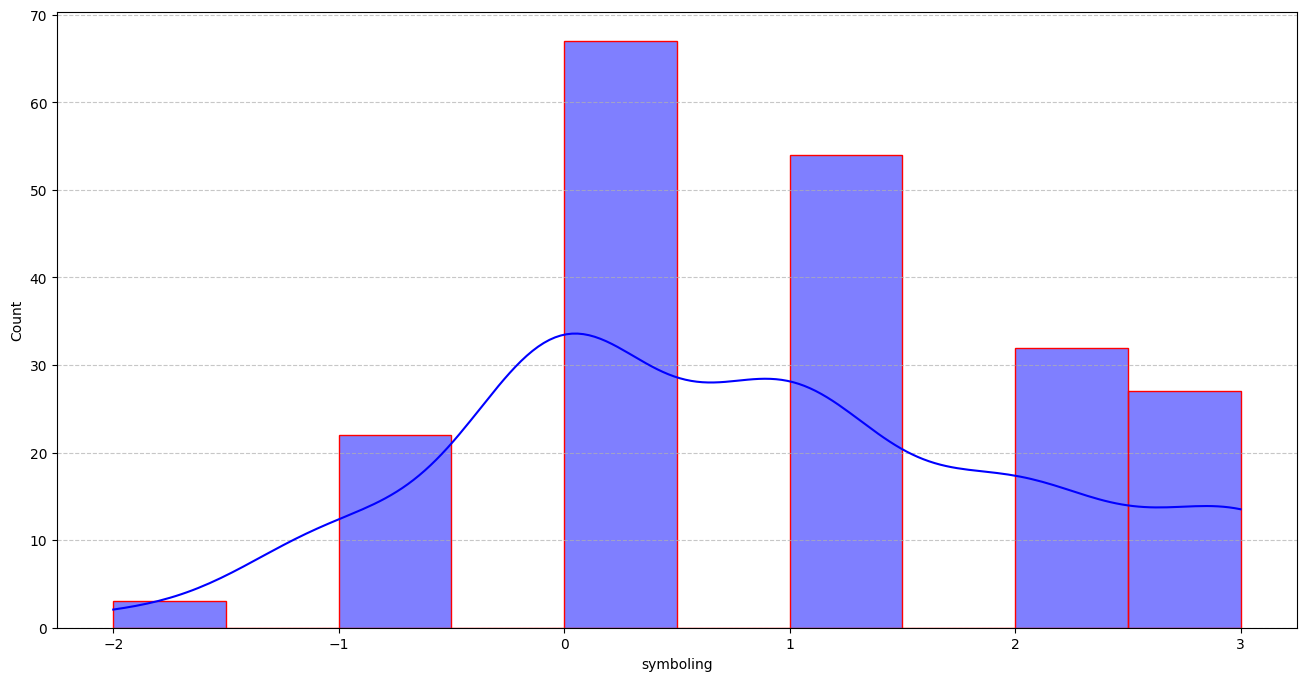

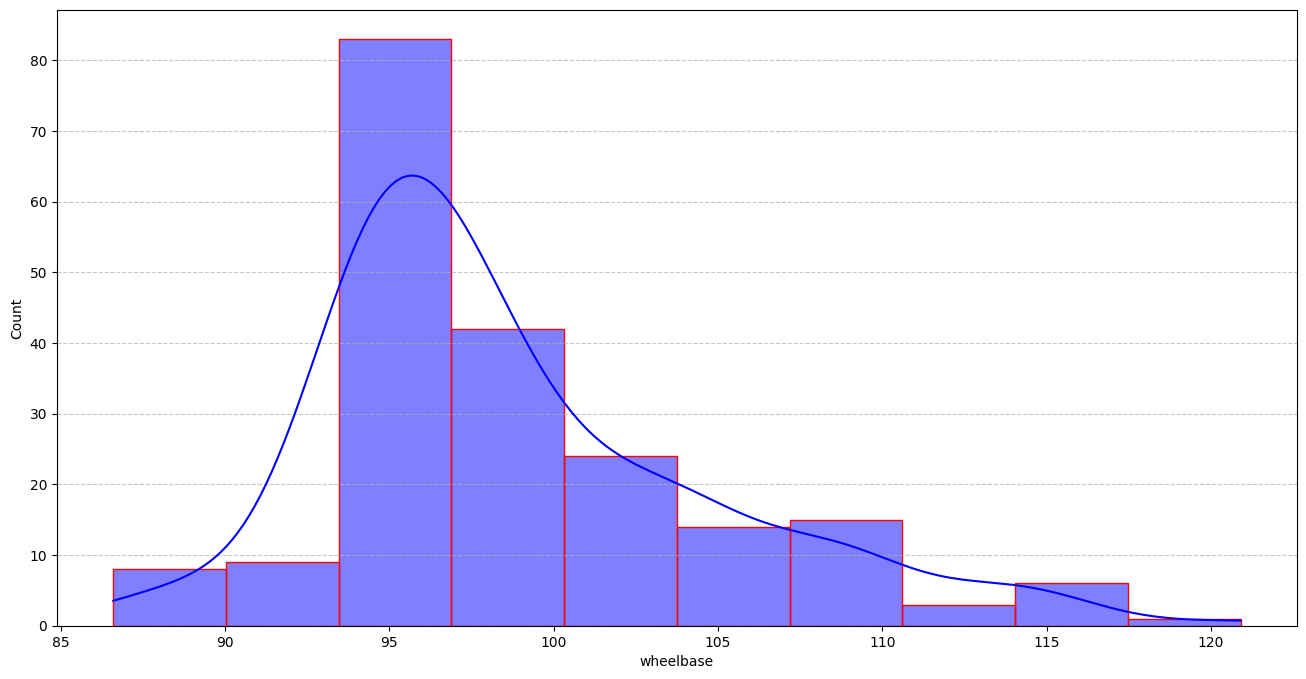

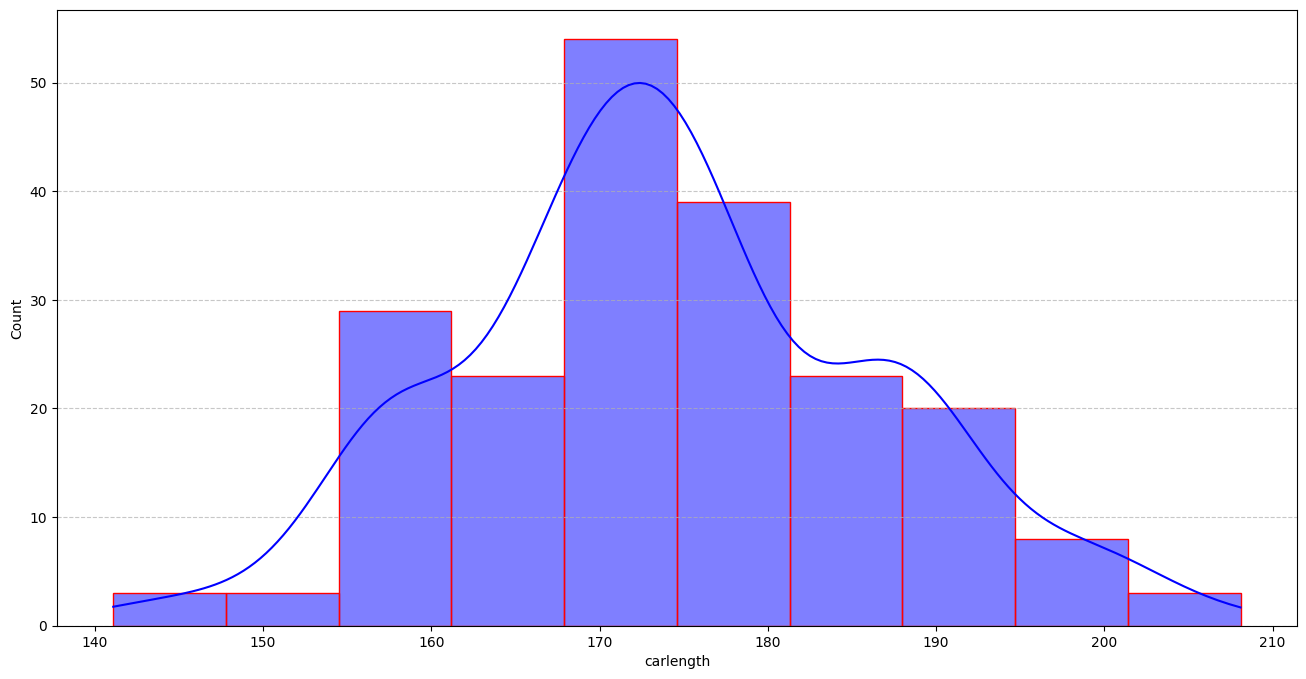

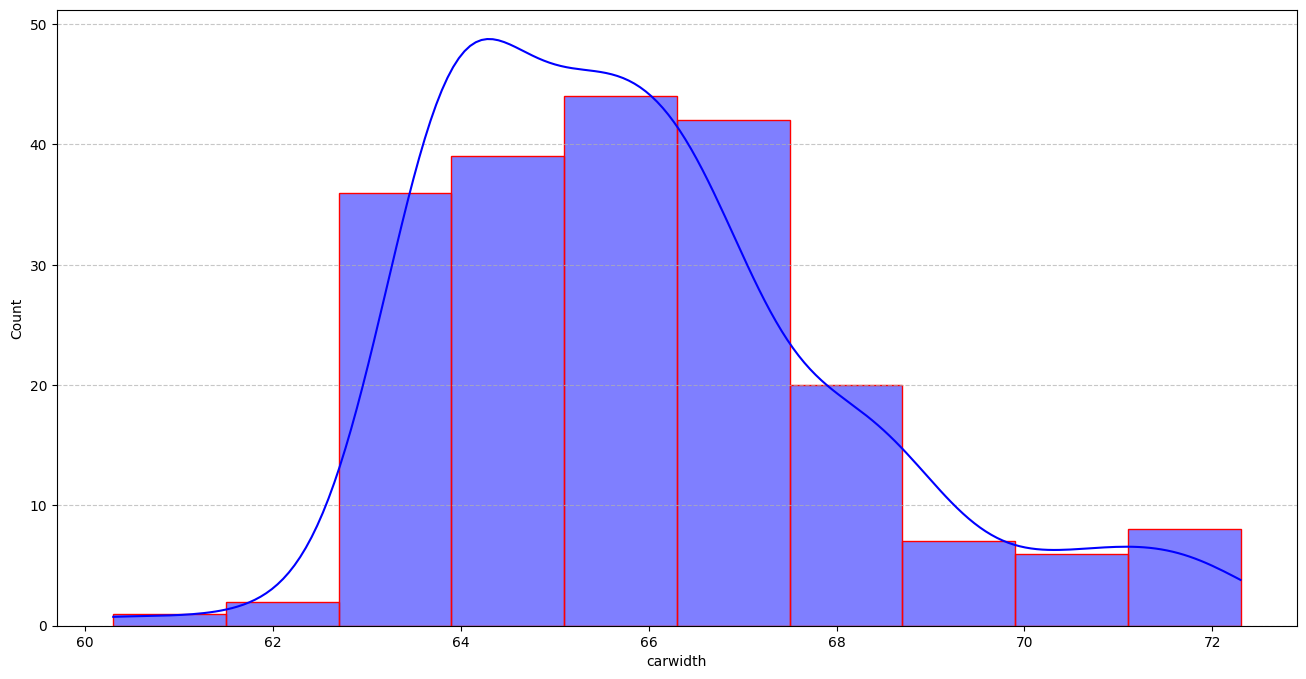

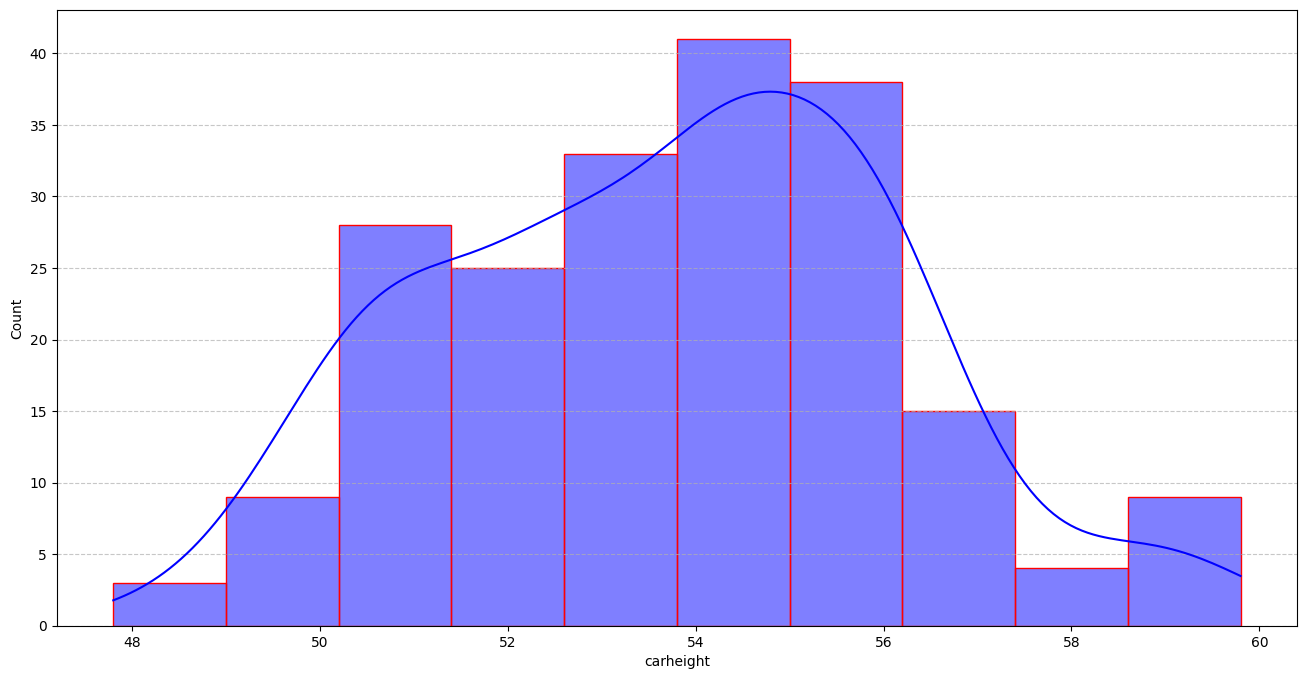

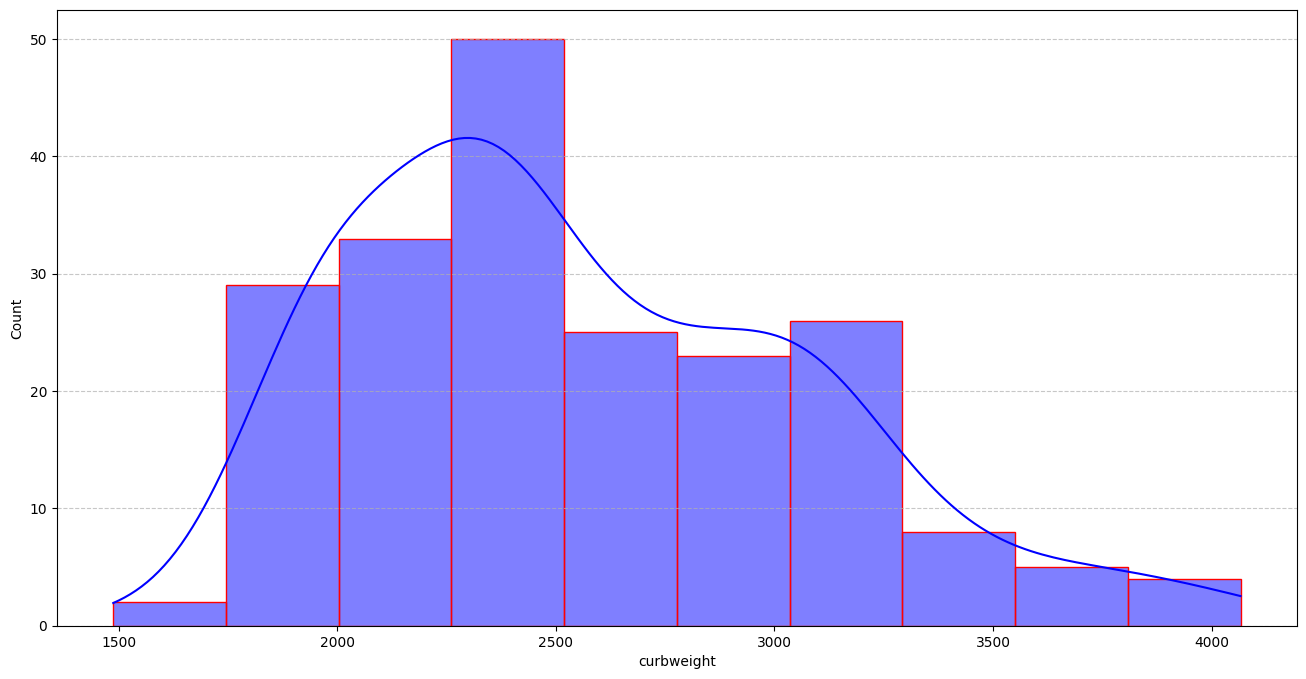

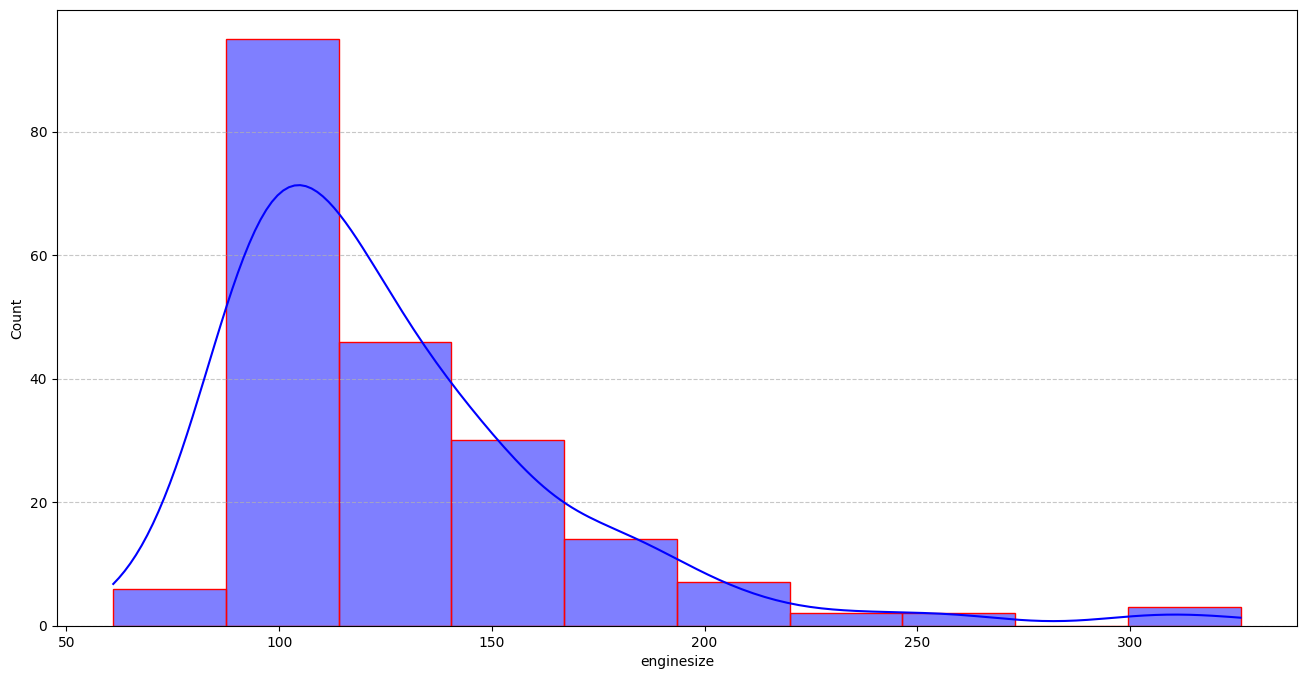

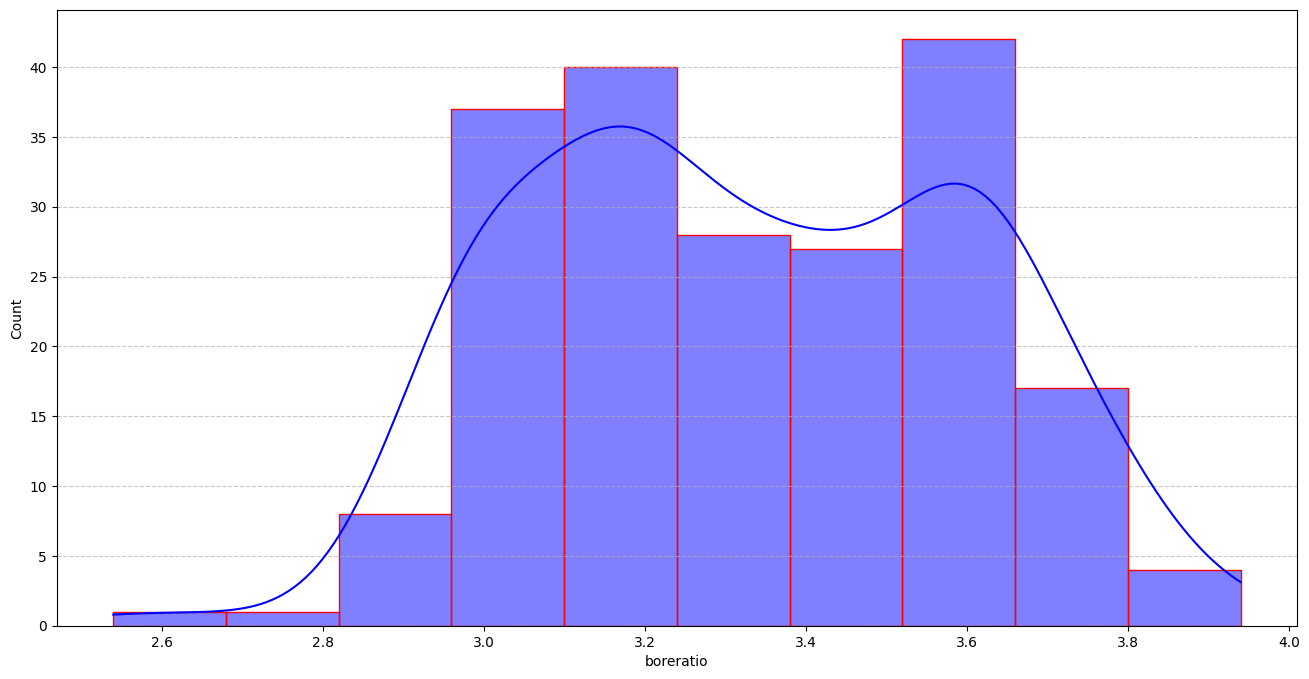

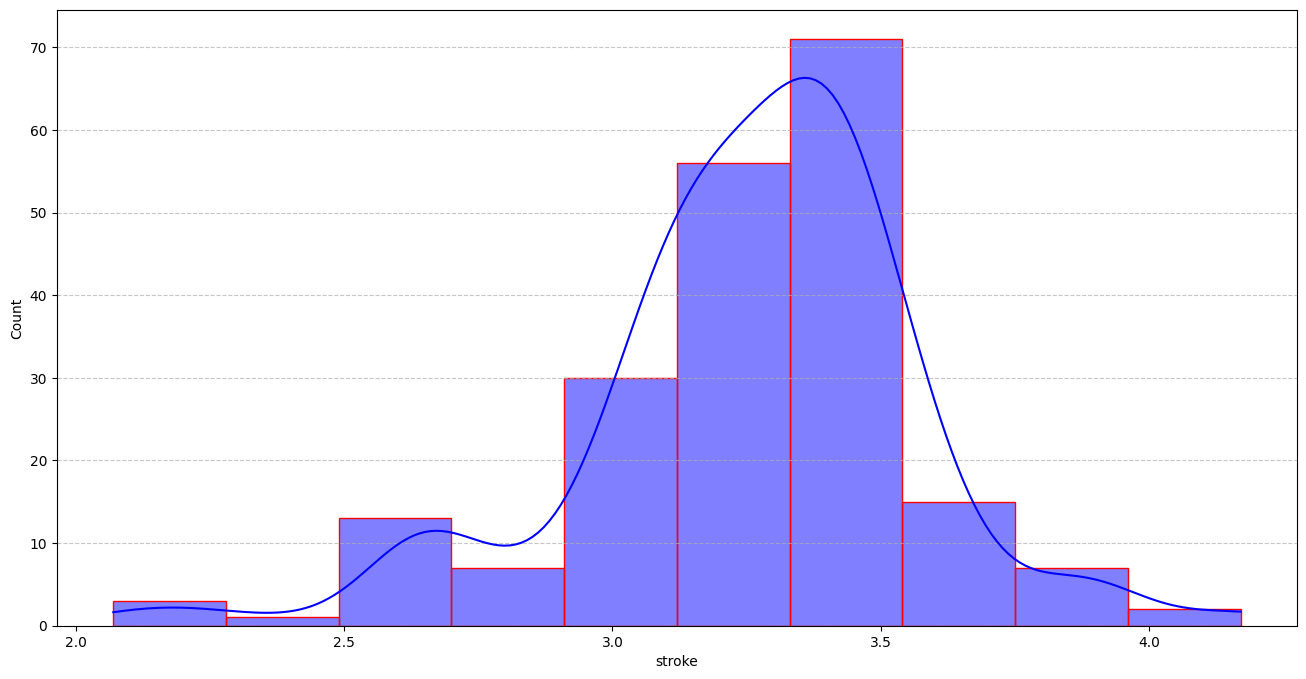

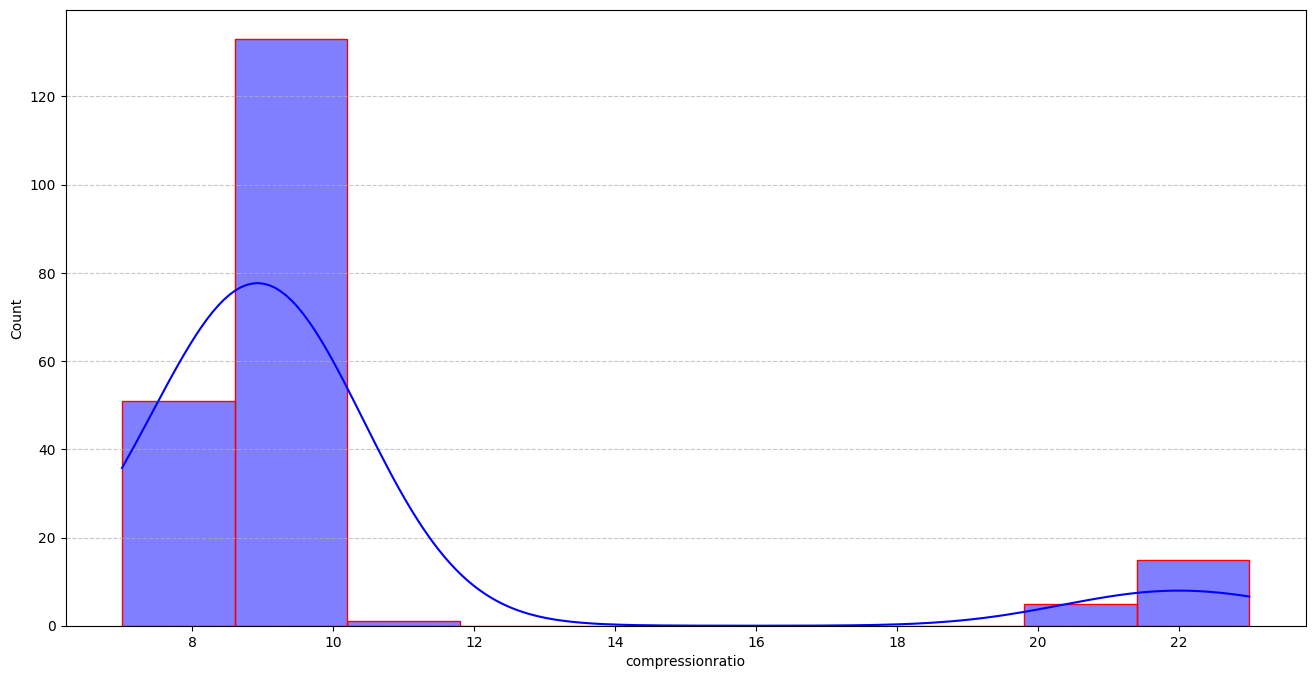

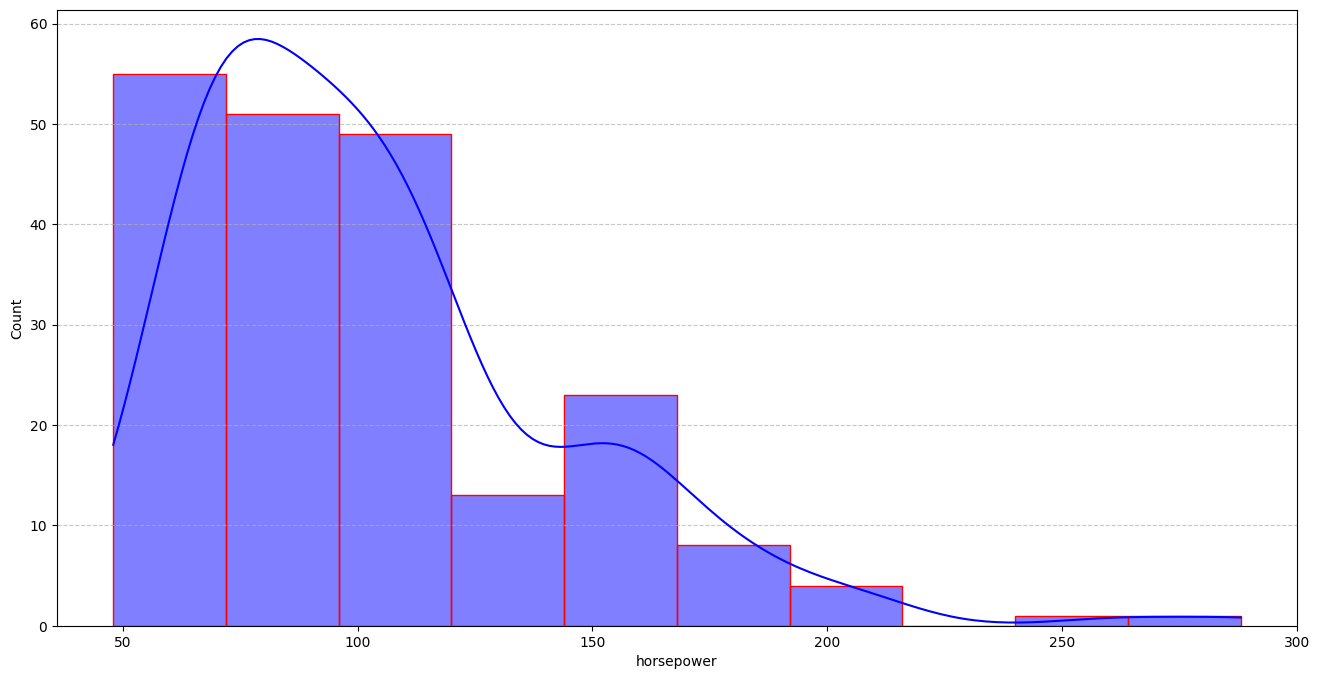

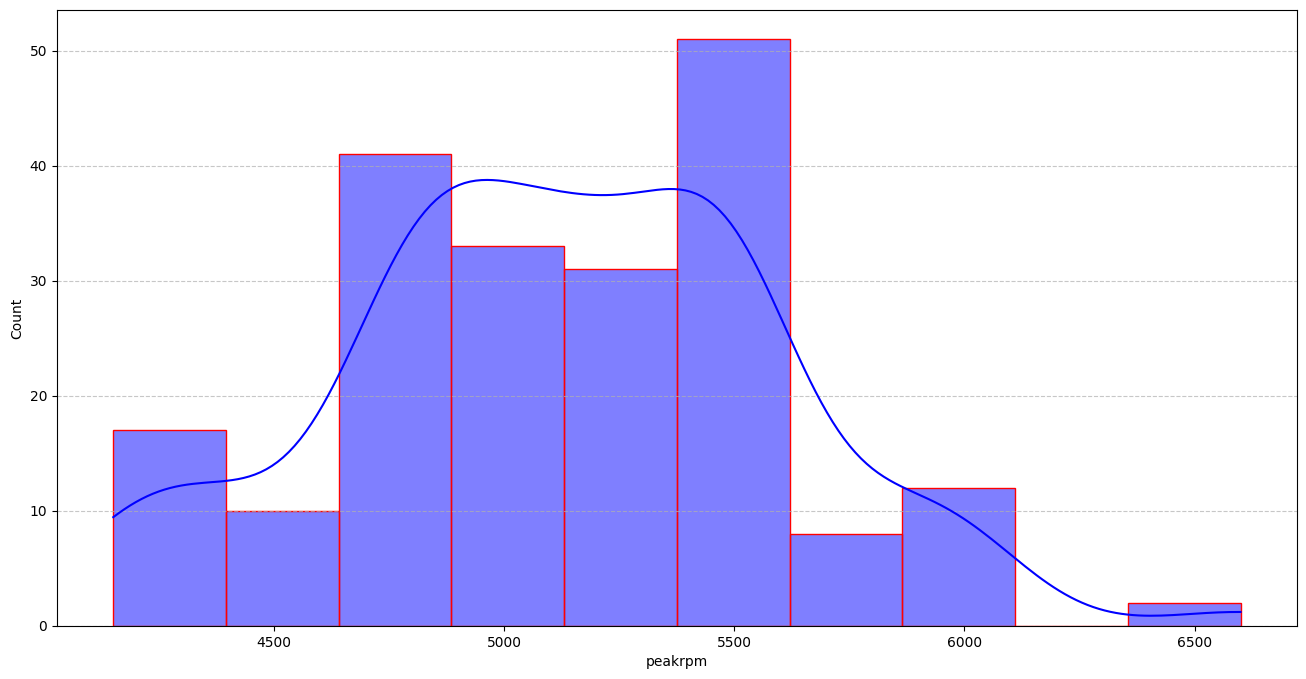

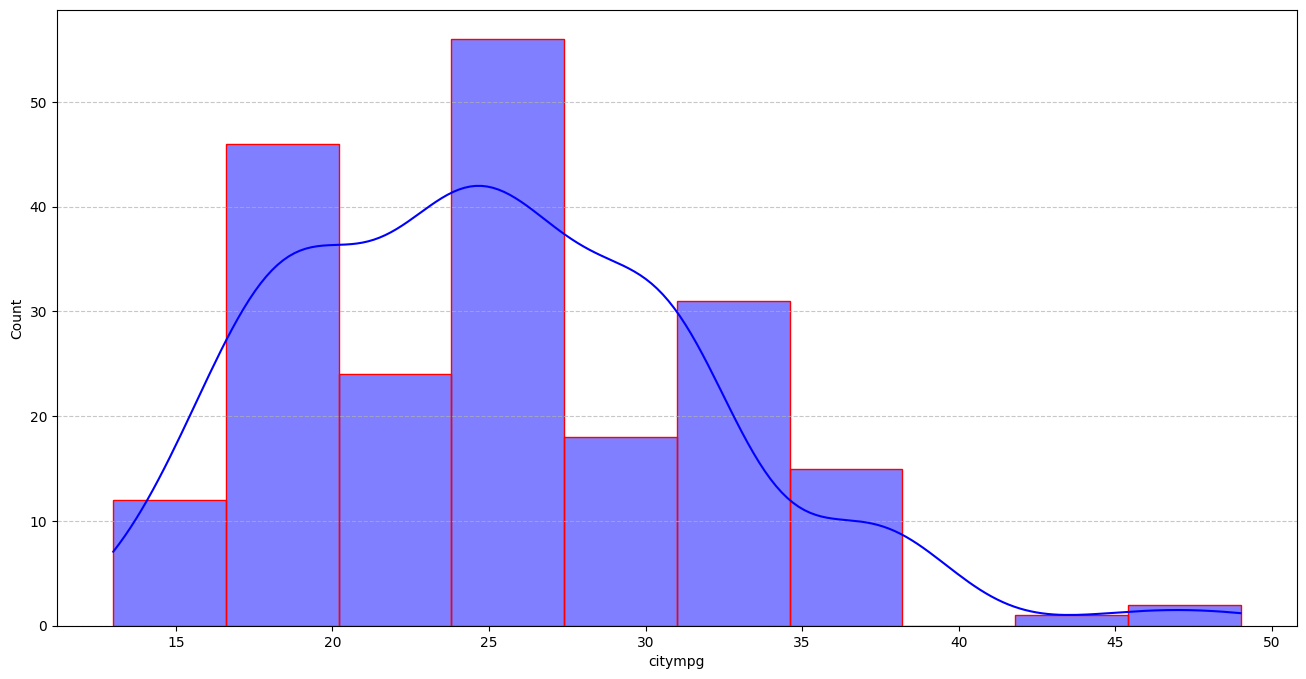

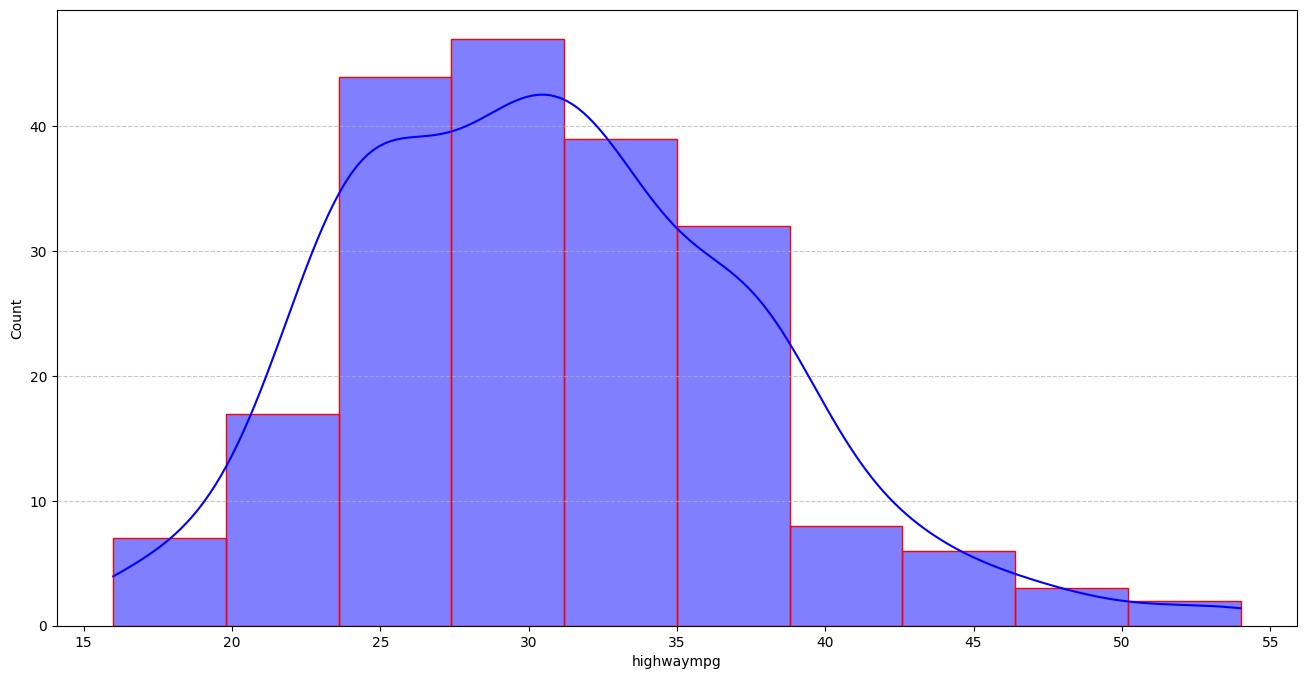

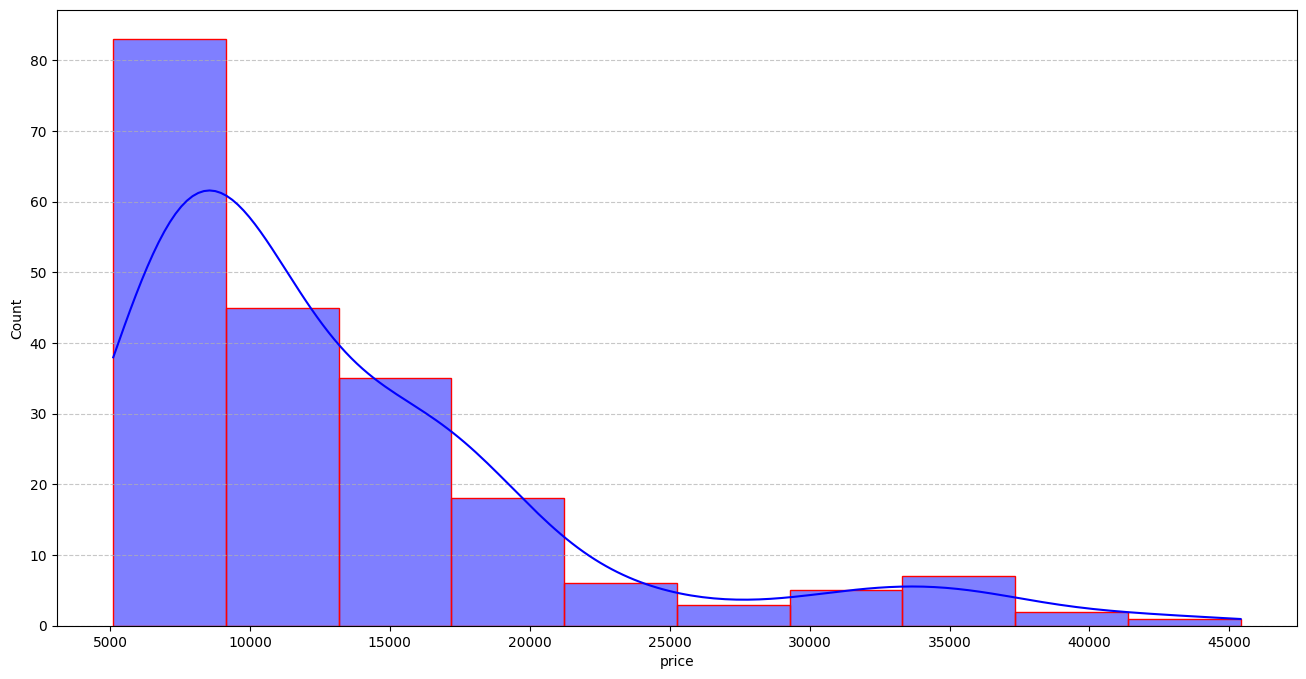

In [18]:
for x in df.select_dtypes(include=['int64','float64']).columns.to_list()[1:]:
  histogram(x)

In [19]:
# function to create count plots for all objects data columns excluding car name
def count_plot(column):
  sns.set_palette('rocket')
  plt.figure(figsize=(16,8))
  sns.countplot(data=df,x=column, order=df[column].value_counts().index, edgecolor='black',linewidth=1.2)

  plt.title(f'Count Plot - {column}', fontsize=18)
  plt.xlabel(column,fontsize=18)
  plt.ylabel('Count',fontsize=18)

  # Rotate x-axis labels amd adjust font size for better readability
  plt.xticks(rotation=45, fontsize=12)
  plt.grid(axis='y',linestyle='--',alpha=0.7)
  plt.show()

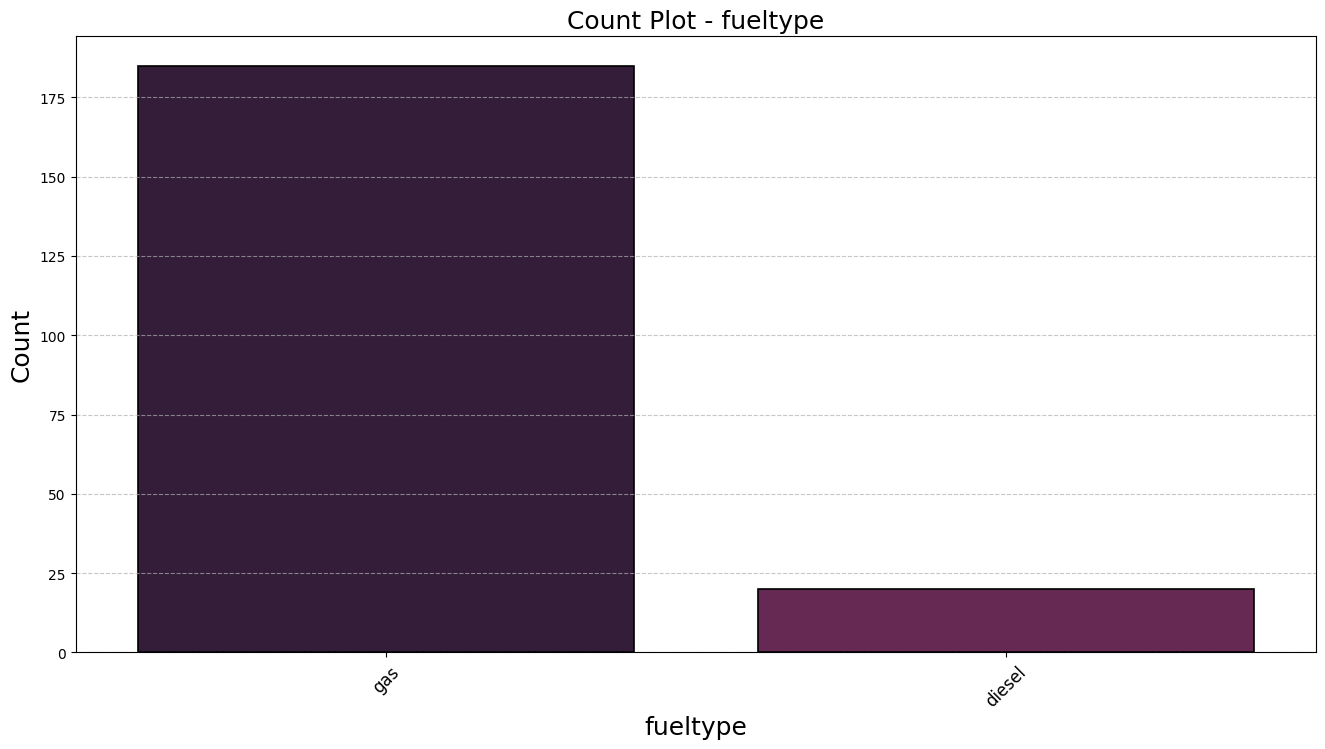

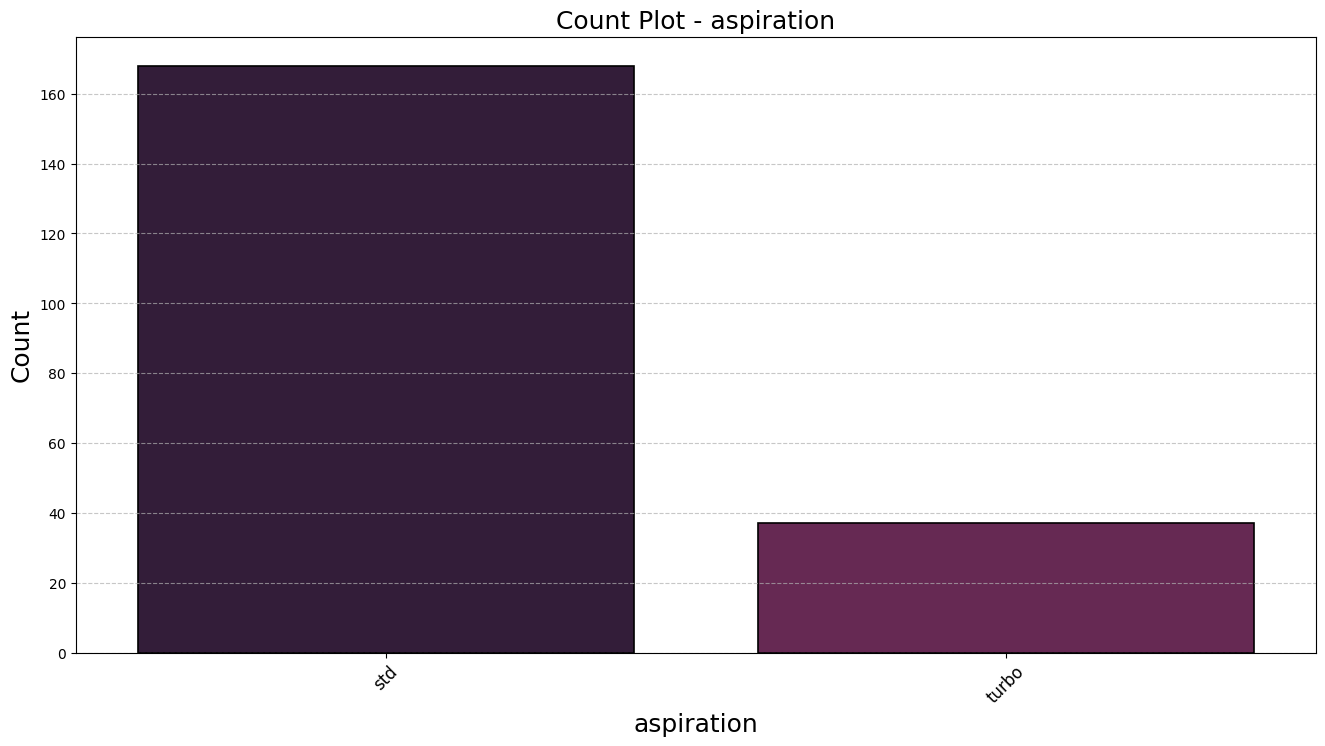

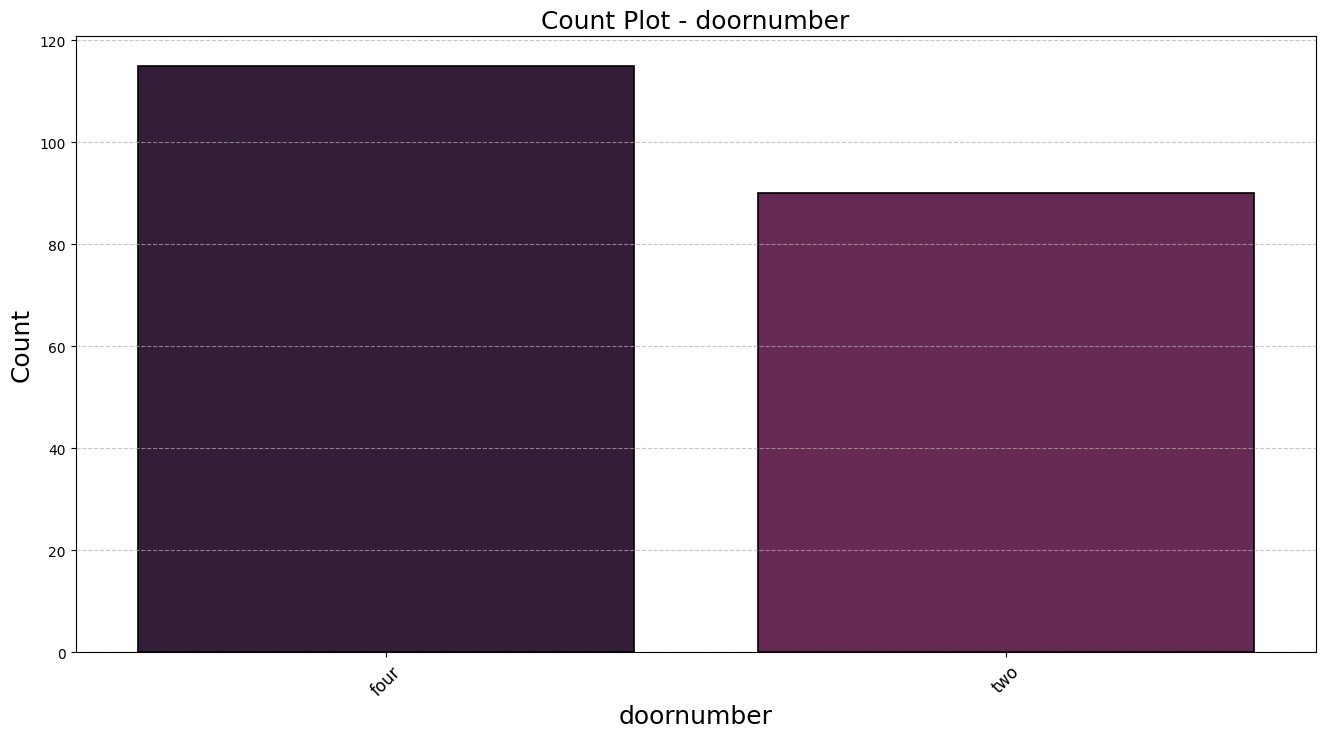

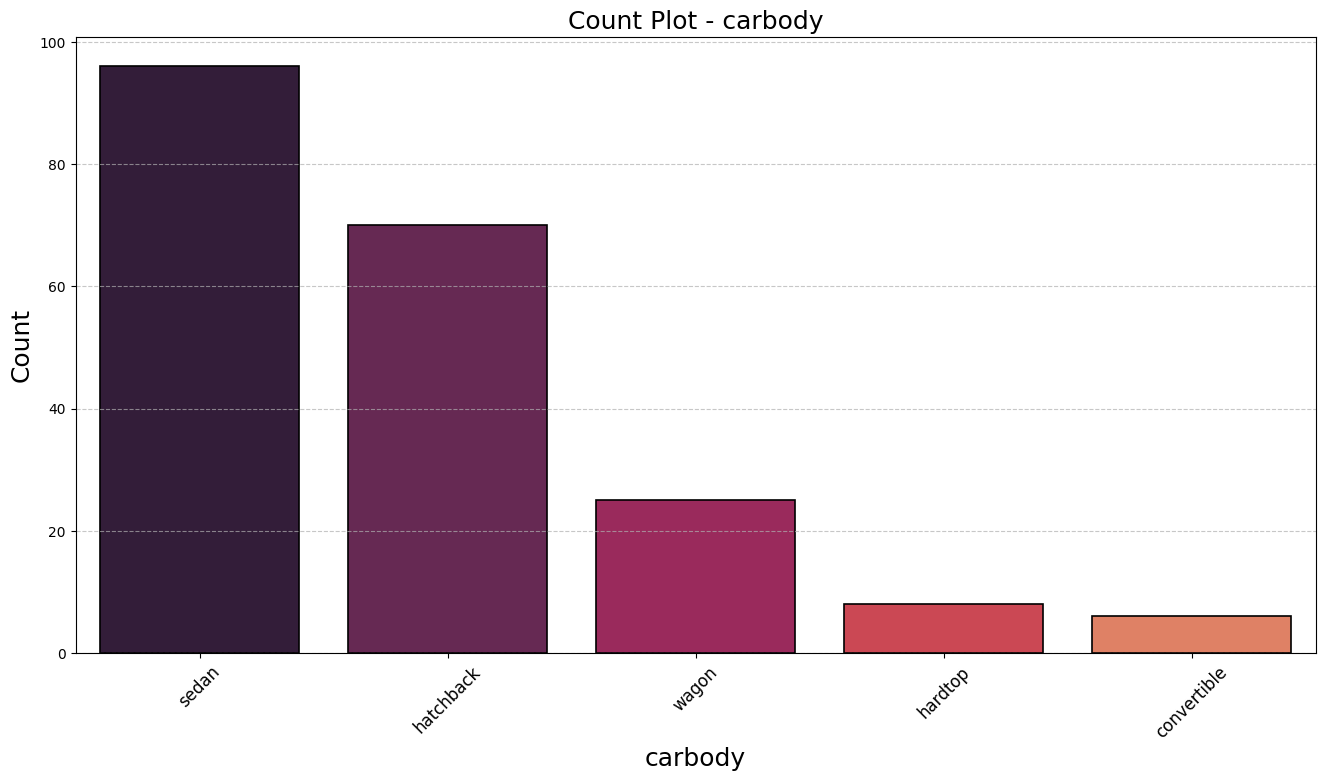

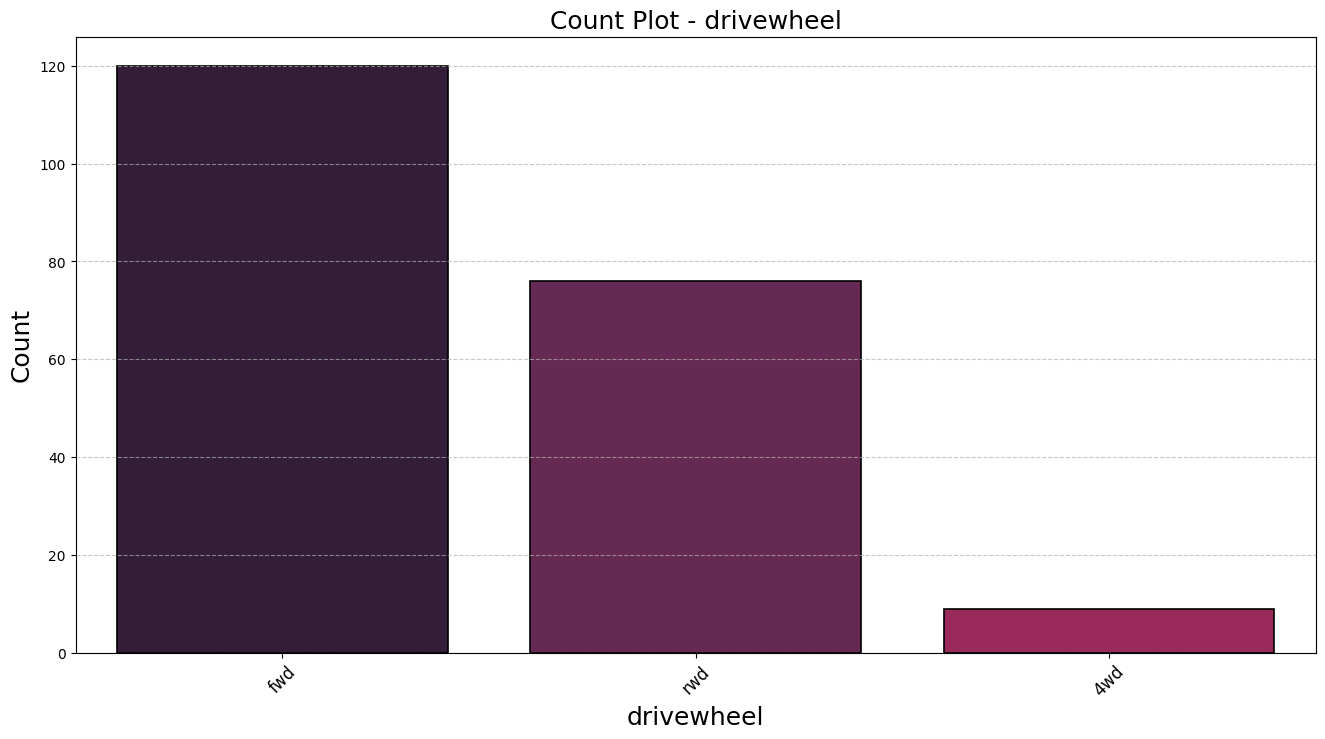

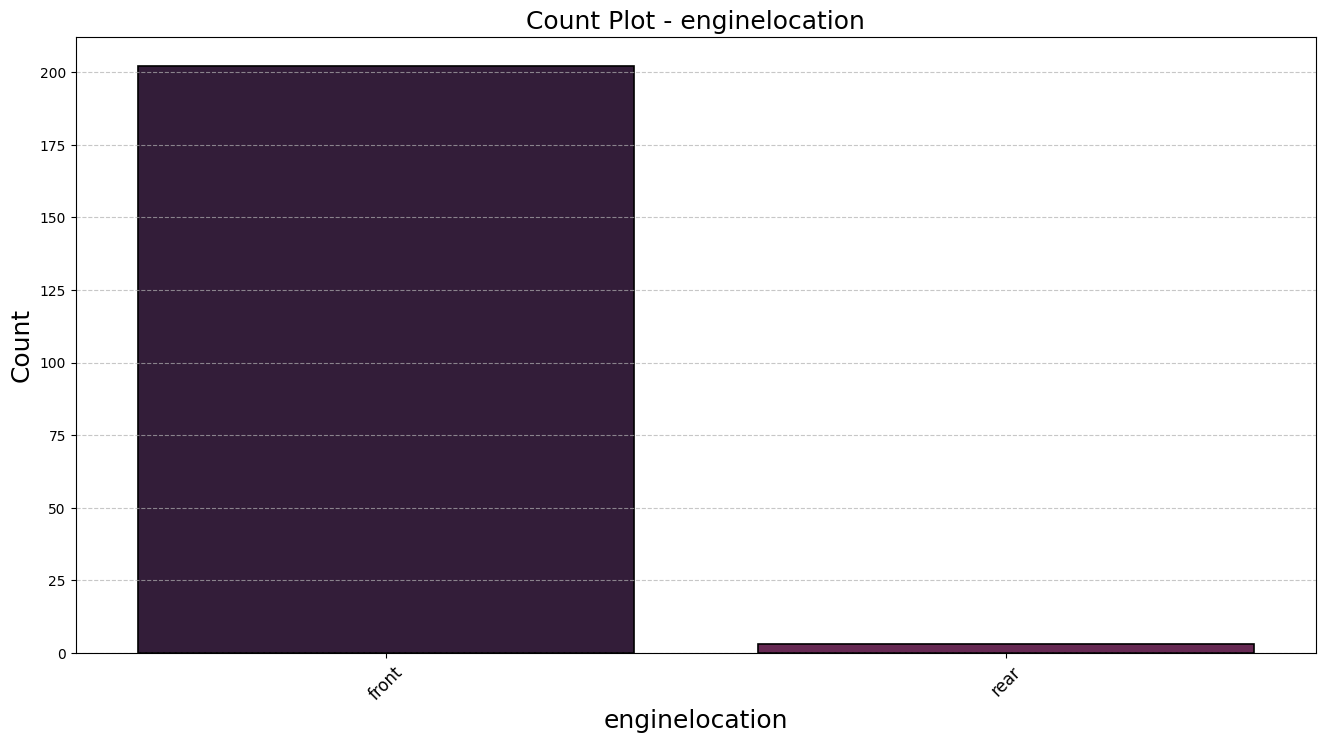

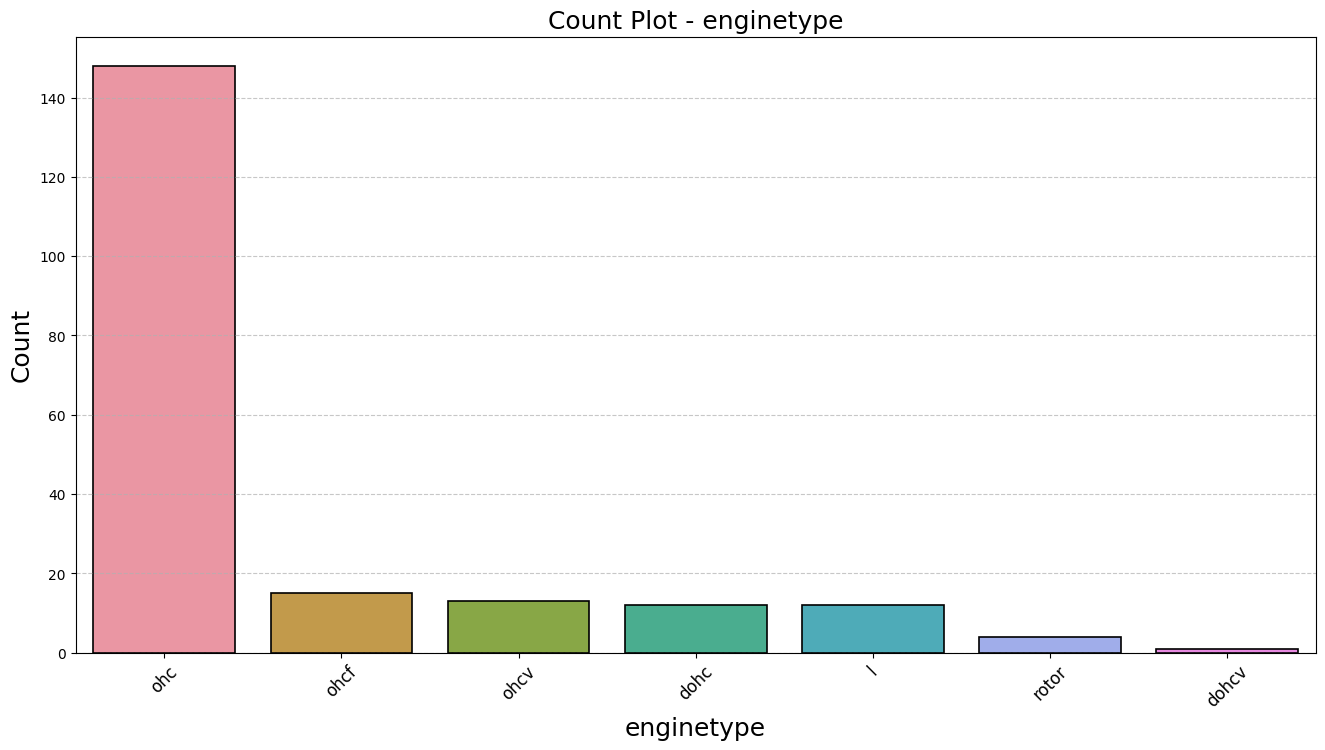

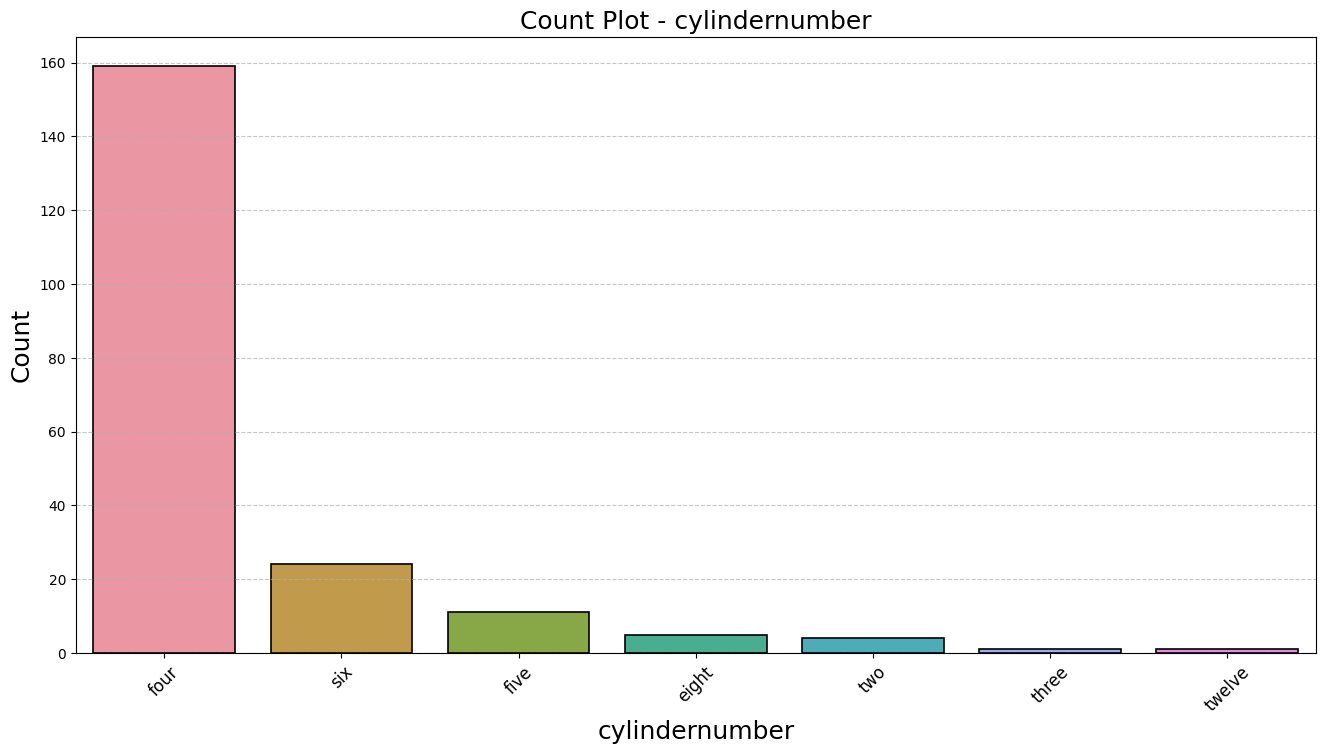

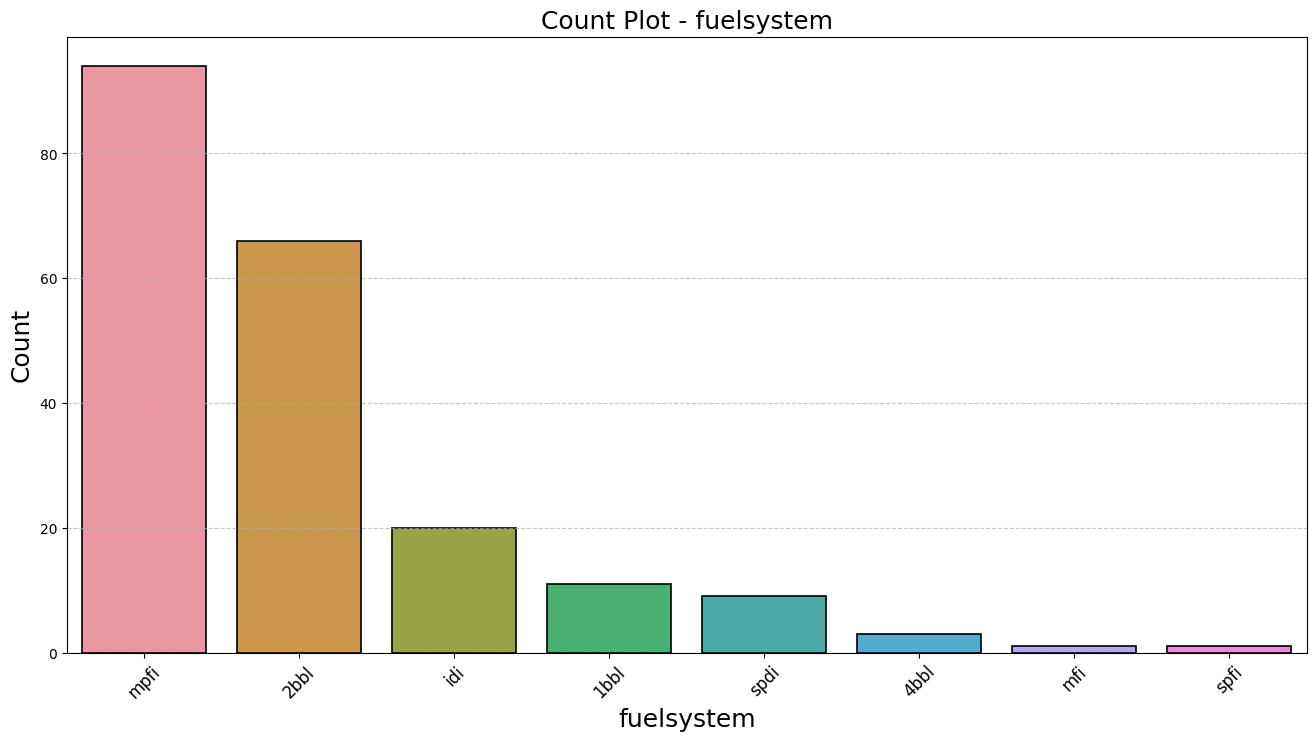

In [20]:
for x in df.select_dtypes(include=['object']).columns.to_list()[1:]:
  count_plot(x)

In [21]:
# now we visualize with respect to the price
def price_box_plot(column):
  sns.set_palette('pastel')
  plt.figure(figsize=(16,8))
  sns.boxplot(x=column,y='price',data=df, width=0.5, fliersize=5, palette='Paired')
  plt.title(f'Box plot: {column} vs Price', fontsize=18)
  plt.xlabel(column, fontsize=14)
  plt.ylabel(column, fontsize=14)
  plt.xticks(rotation=45, fontsize=14)
  plt.grid(axis='y',linestyle='--', alpha=0.7)
  plt.show()

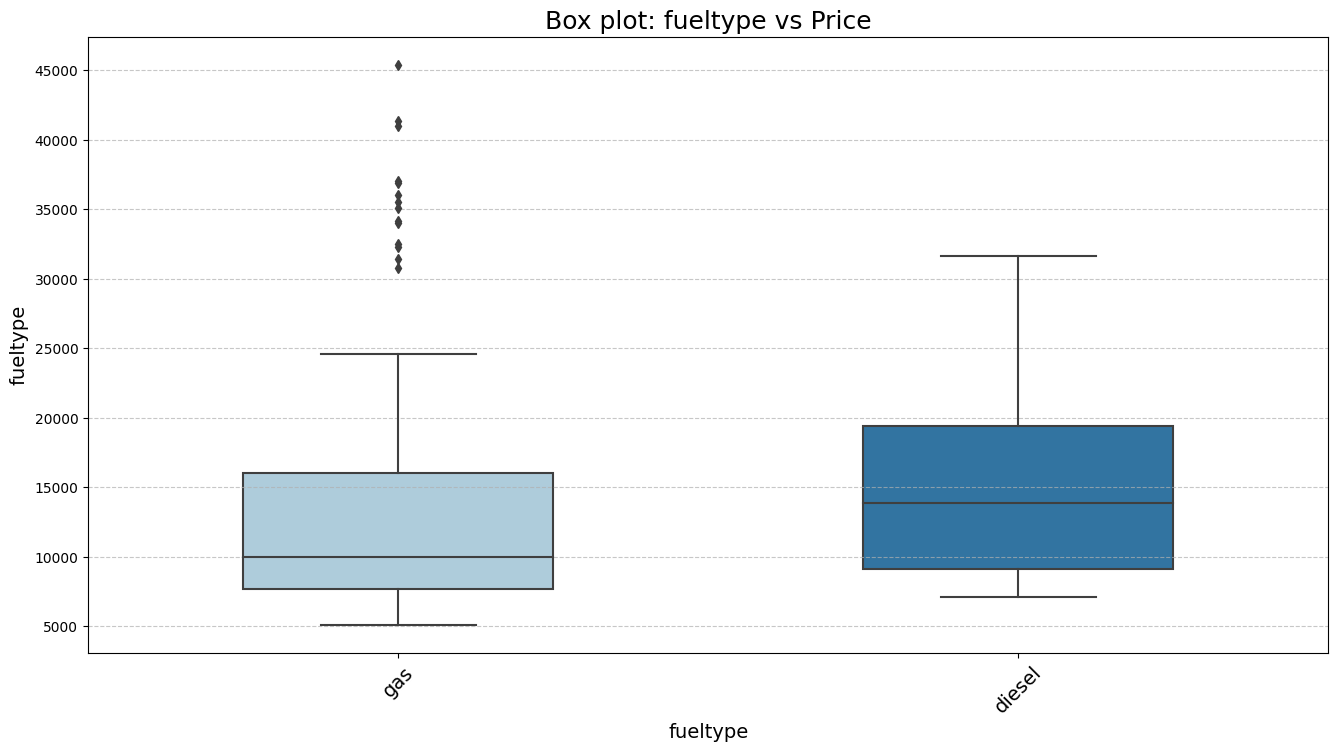

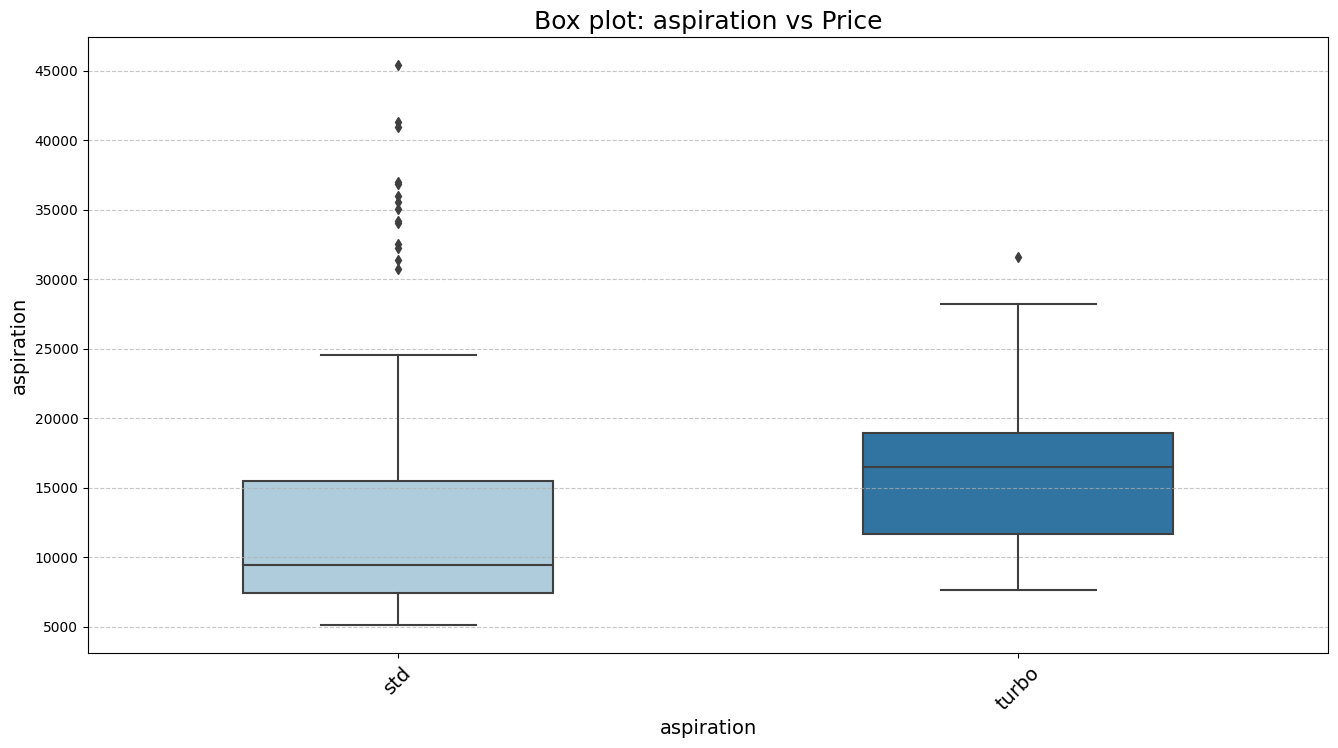

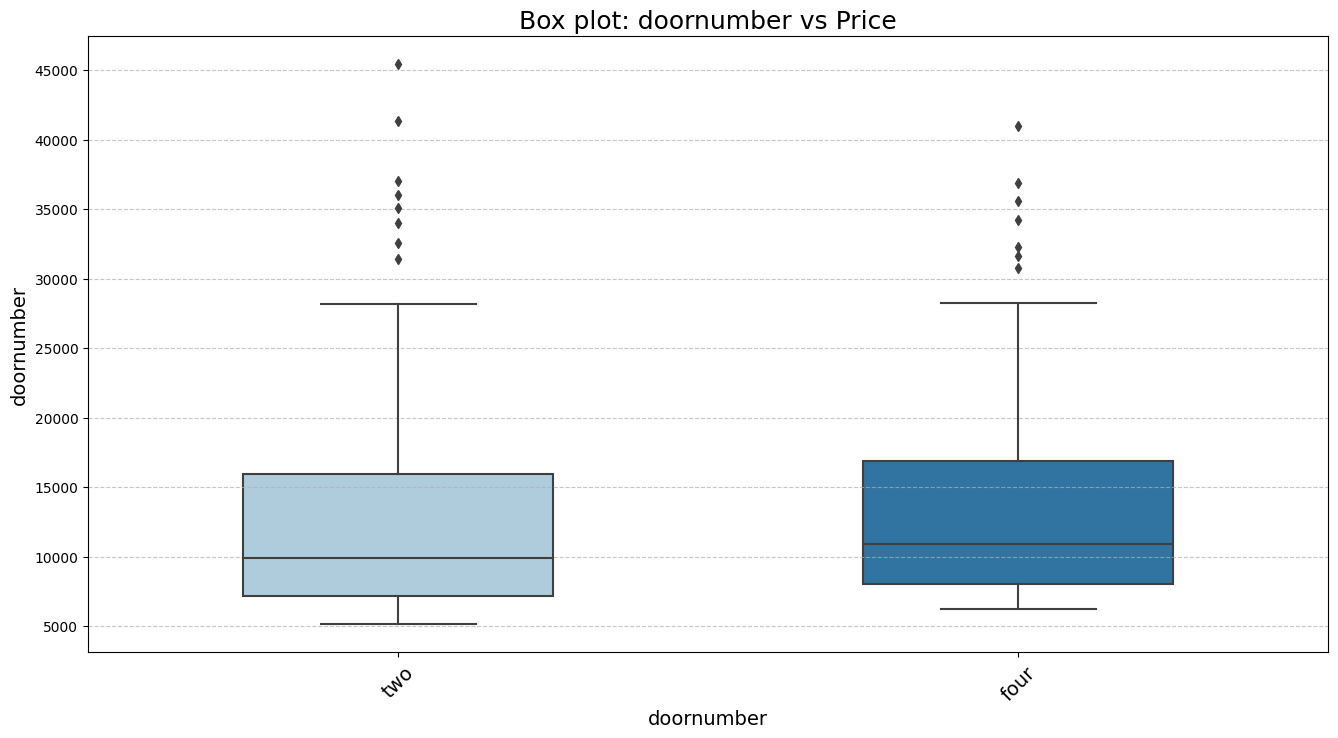

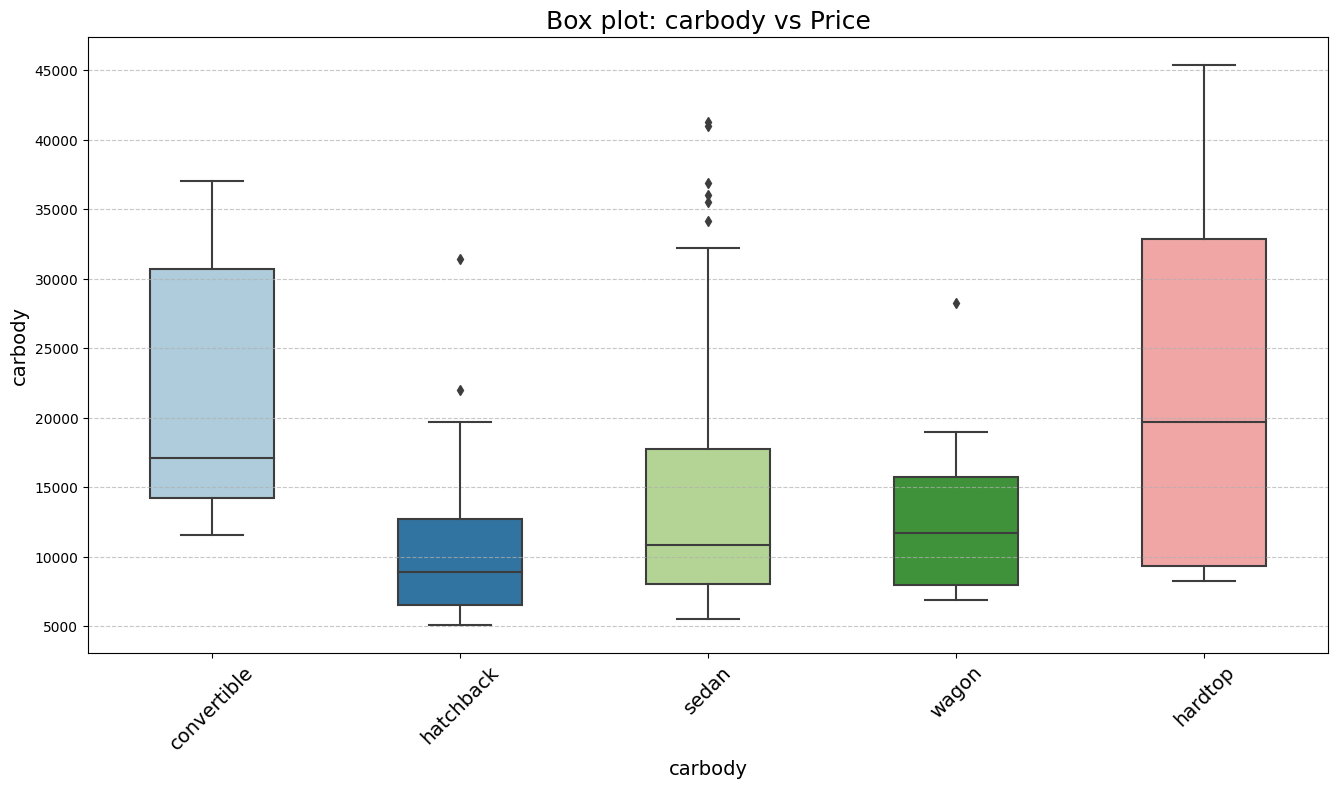

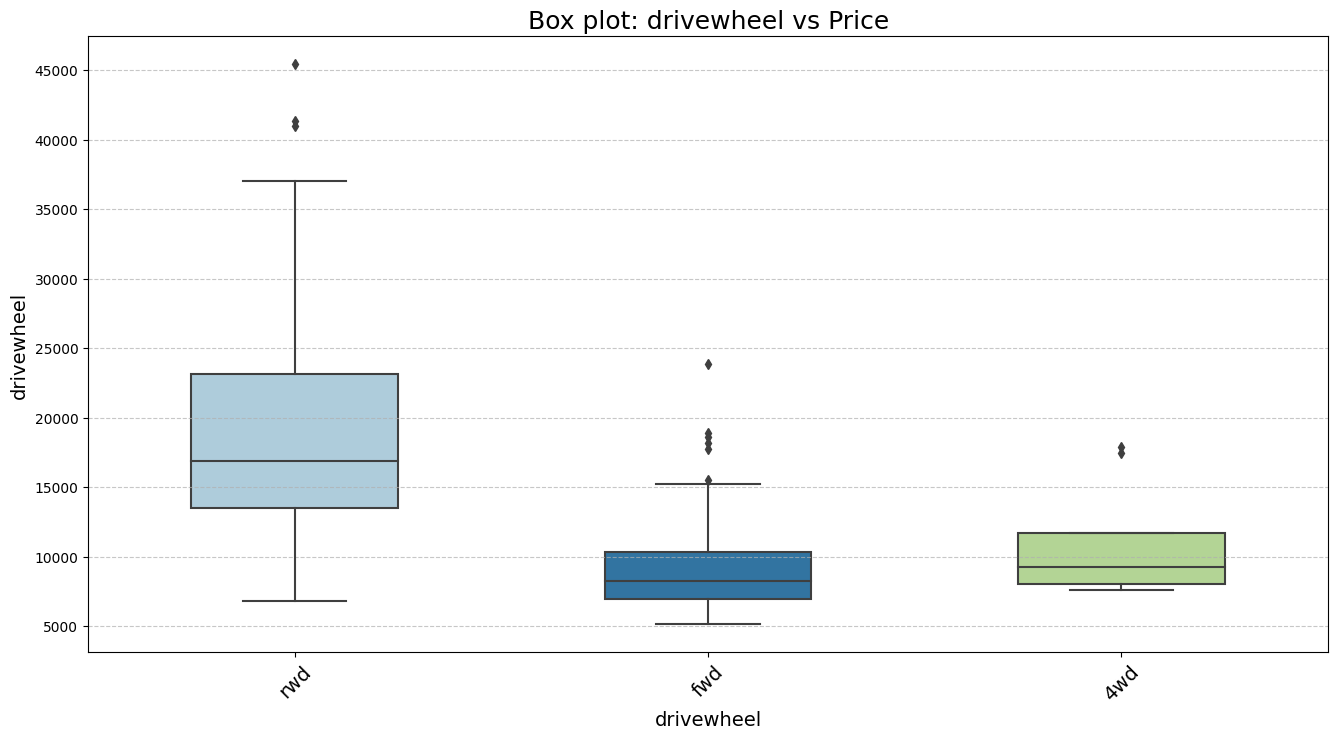

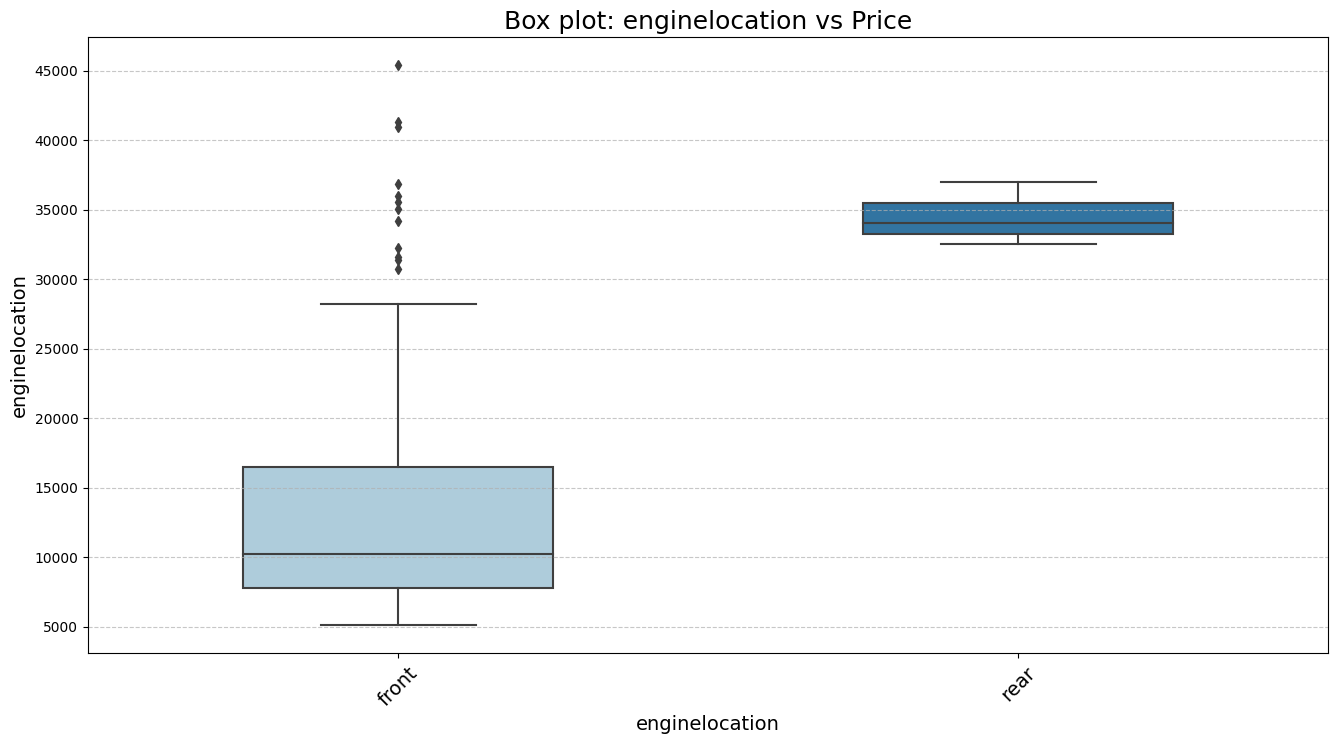

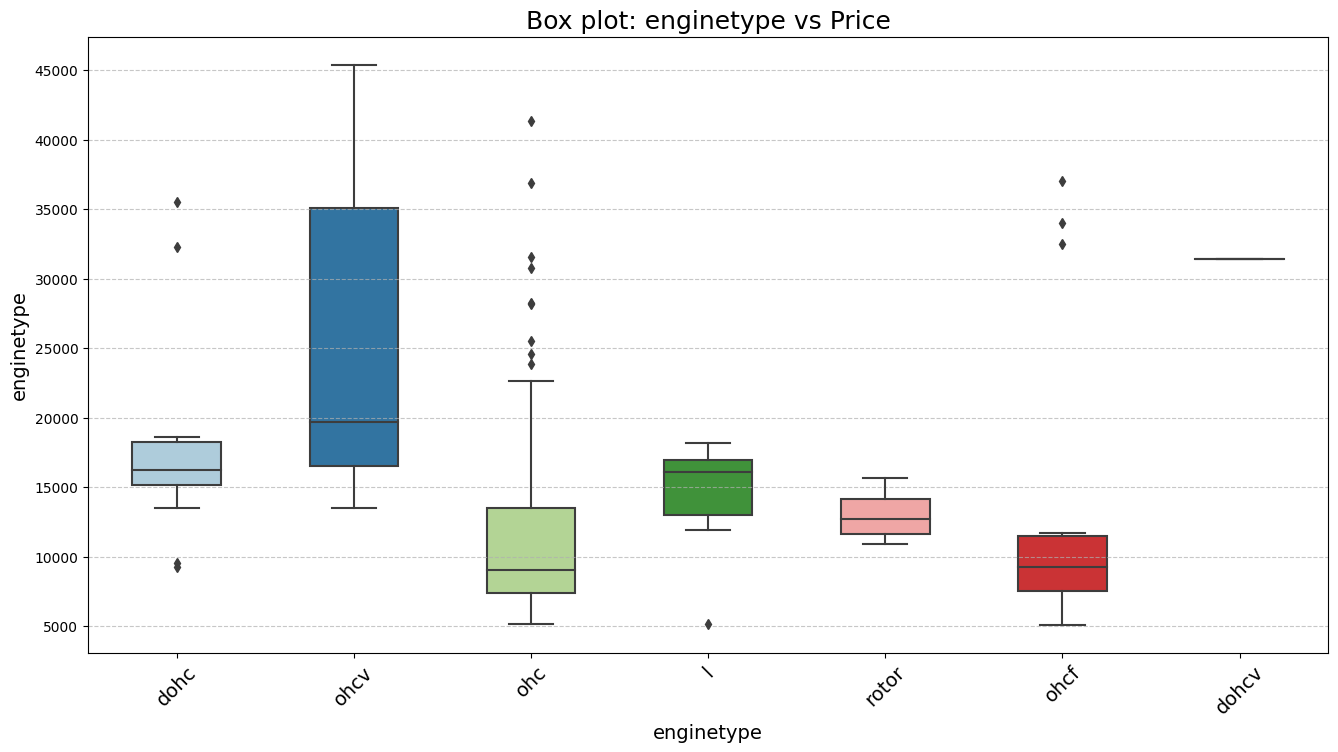

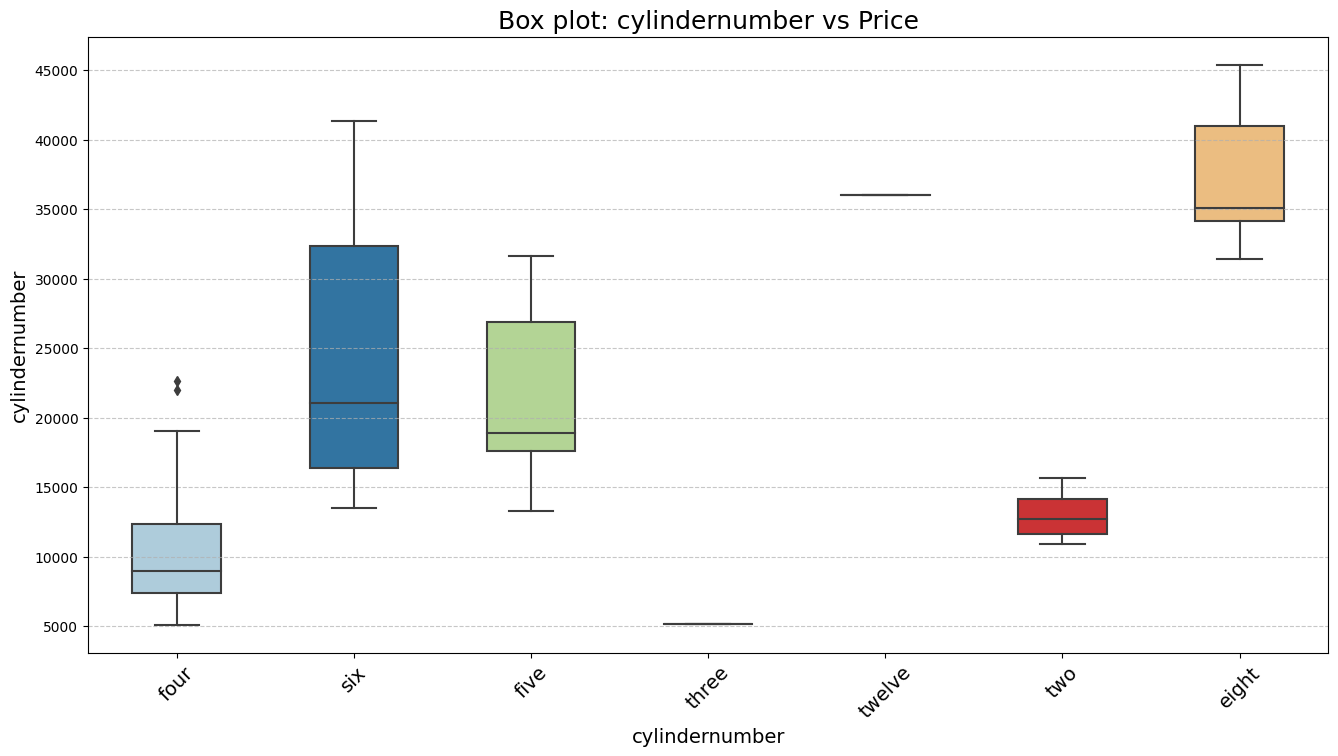

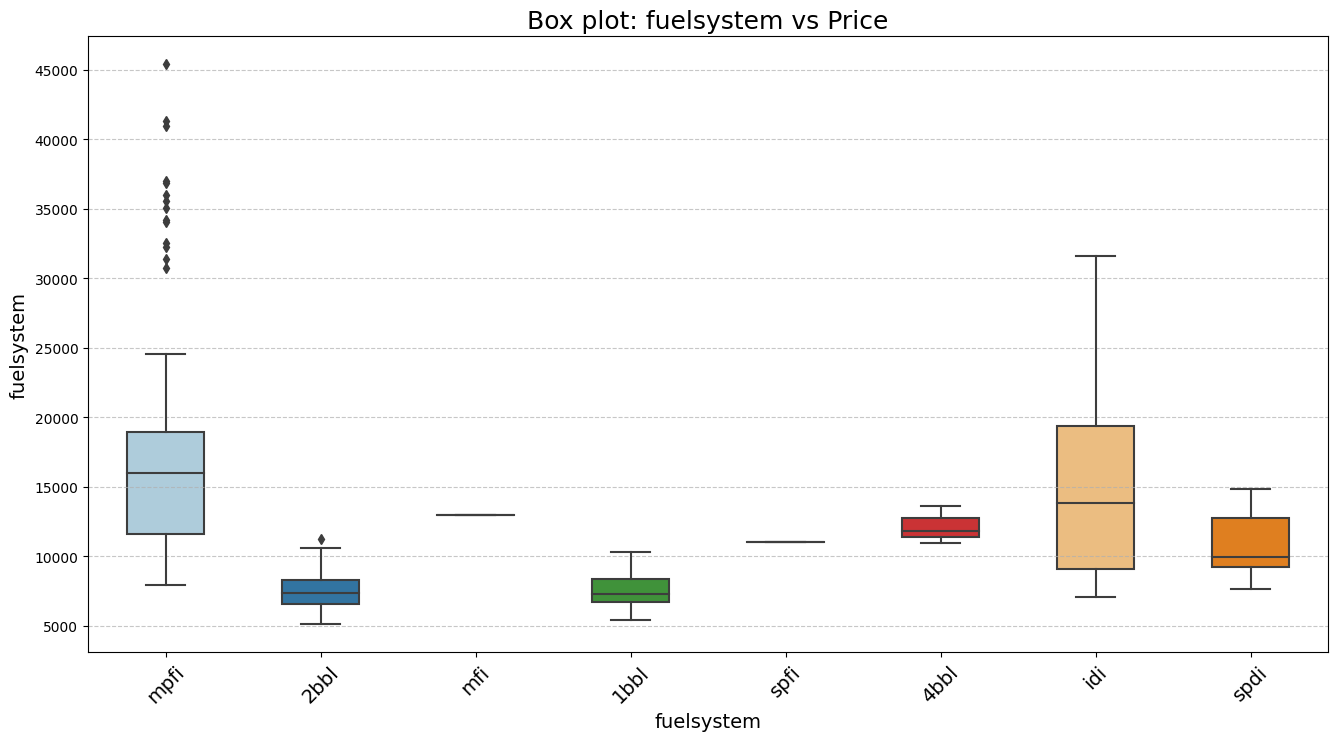

In [22]:
for x in df.select_dtypes(include=['object']).columns.tolist()[1:]:
  price_box_plot(x)

In [23]:
# Data Engineering works
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [24]:
# creating a fucntion to fix the CarName colum
def clean_carname(car_name):
  return car_name.split(" ")[0].lower()
# apply the clean_car_name function to the CarName column
df['CarName'] = df['CarName'].apply(clean_carname)
# see unique values after fixing
df['CarName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [25]:
# fix typing mistakes
df['CarName'] = df['CarName'].str.replace("vw","volkswagen")
df['CarName'] = df['CarName'].str.replace('maxda','mazda')
df['CarName'] = df['CarName'].str.replace('toyouta','toyota')
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')

In [26]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

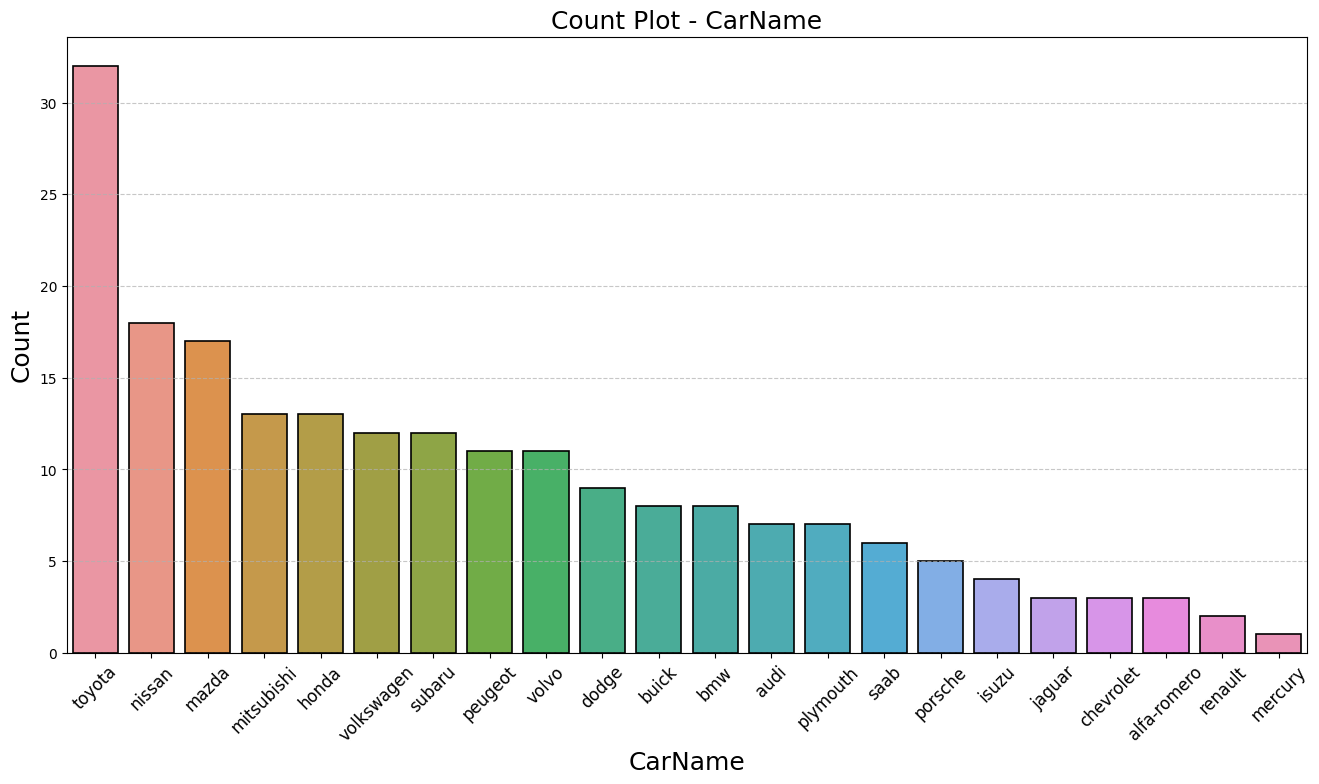

In [27]:
count_plot('CarName')

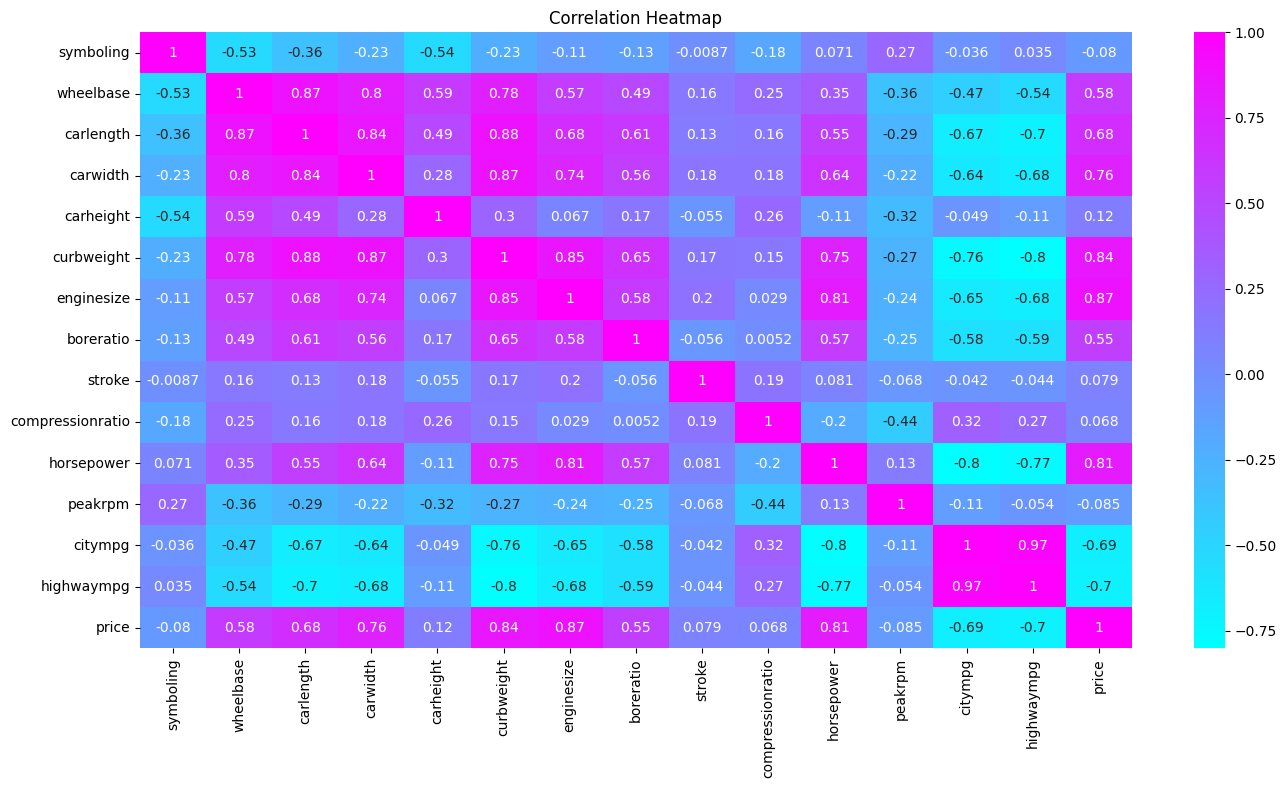

In [28]:
# corelation matrix
col_mat = df[df.select_dtypes(include=['int64','float64']).columns[1:]].corr()
plt.figure(figsize=(16,8))
sns.heatmap(col_mat, annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [31]:
df.drop('car_ID', axis=1, inplace=True)

In [32]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
# taking categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
print(categorical_columns)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [34]:
# taking numerical columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_columns = numerical_columns[:-1]
print(numerical_columns)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [35]:
X = df.drop('price', axis=1)
y = df['price']

In [36]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [37]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [38]:
# Data Preprocessing

In [39]:
# # Splitting into training and testing
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [40]:
# # create transformers for numerical and categorical values
# categorical_transformers = Pipeline(steps=[
#     ('onehot',OneHotEncoder(sparse=False, handle_unknown='ignore',drop='first'))
# ])
# numerical_transformers = Pipeline(steps=[
#     ('scaler',MinMaxScaler()) # Change StandardScaler to MinMaxScaler
# ])

In [41]:
# # Combine transformers using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_transformers, categorical_columns),
#         ('num',numerical_transformers, numerical_columns)
#     ],
#     remainder='passthrough'# Include non-transformed columns
# )

In [42]:
# # Apply transformations to training, validation, and test sets
# X_train_preprocessed = preprocessor.fit_transform(X_train)
# X_val_preprocessed = preprocessor.fit_transform(X_val)
# X_test_preprocessed = preprocessor.fit_transform(X_test)

# # Get the column names after transformation
# transformed_feature_names = preprocessor.get_feature_names_out()
# column_names_after_transform = transformed_feature_names.tolist() + X.columns.difference(categorical_columns + numerical_columns).tolist()

# # Check the preprocessed DataFrames
# print(pd.DataFrame(X_train_preprocessed, columns=column_names_after_transform).head())
# print(pd.DataFrame(X_val_preprocessed, columns=column_names_after_transform).head())
# print(pd.DataFrame(X_test_preprocessed, columns=column_names_after_transform).head())

In [43]:
# X contains features, y contains target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create transformers for categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # Change StandardScaler to MinMaxScaler
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ], 
    remainder='passthrough'  # Include non-transformed columns
)

# Apply transformations to training, validation, and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Get the column names after transformation
transformed_feature_names = preprocessor.get_feature_names_out()
column_names_after_transform = transformed_feature_names.tolist() + X.columns.difference(categorical_columns + numerical_columns).tolist()

# Check the preprocessed DataFrames
print(pd.DataFrame(X_train_preprocessed, columns=column_names_after_transform).head())
print(pd.DataFrame(X_val_preprocessed, columns=column_names_after_transform).head())
print(pd.DataFrame(X_test_preprocessed, columns=column_names_after_transform).head())

   cat__CarName_audi  cat__CarName_bmw  cat__CarName_buick  \
0                0.0               0.0                 0.0   
1                0.0               0.0                 0.0   
2                0.0               0.0                 0.0   
3                1.0               0.0                 0.0   
4                0.0               0.0                 0.0   

   cat__CarName_chevrolet  cat__CarName_dodge  cat__CarName_honda  \
0                     0.0                 0.0                 0.0   
1                     0.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   

   cat__CarName_isuzu  cat__CarName_jaguar  cat__CarName_mazda  \
0                 0.0                  0.0                 0.0   
1                 0.0                  0.0                 0.0   
2             

In [44]:
X_train_preprocessed=pd.DataFrame(X_train_preprocessed, columns=column_names_after_transform)

In [45]:
X_val_preprocessed=pd.DataFrame(X_val_preprocessed, columns=column_names_after_transform)

In [46]:
X_test_preprocessed=pd.DataFrame(X_test_preprocessed, columns=column_names_after_transform)

In [47]:
X_train_preprocessed.head()

,cat__CarName_audi,cat__CarName_bmw,cat__CarName_buick,cat__CarName_chevrolet,cat__CarName_dodge,cat__CarName_honda,cat__CarName_isuzu,cat__CarName_jaguar,cat__CarName_mazda,cat__CarName_mercury,...,num__carheight,num__curbweight,num__enginesize,num__boreratio,num__stroke,num__compressionratio,num__horsepower,num__peakrpm,num__citympg,num__highwaympg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.558333,0.088117,0.128906,0.321429,0.666667,0.93125,0.012712,0.265306,1.00000,1.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.591667,0.225634,0.203125,0.550000,0.700000,0.10625,0.169492,0.020408,0.50000,0.529412
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.475000,0.091233,0.105469,0.435714,0.580952,0.15000,0.072034,0.428571,0.56250,0.617647
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.441667,0.306186,0.257812,0.464286,0.633333,0.09375,0.245763,0.551020,0.18750,0.264706
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.350000,0.320872,0.296875,0.771429,0.680952,0.14375,0.271186,0.265306,0.34375,0.411765


In [48]:
X_train_preprocessed.shape

(153, 62)

In [49]:
# calculate the average price of the train dataset
mean_price = y_train.mean()
print("Average Price :", mean_price)

Average Price : 13367.35294117647


In [50]:
# calculate the mean_absolute error
print("MAE of Test Data :", abs(y_test - mean_price).mean())

MAE of Test Data : 5434.986425339366


In [51]:
# Building Machine Learning Model
input_dim = X_train_preprocessed.shape[1]
input_dim

62

In [52]:
model = keras.Sequential([
    layers.Dense(units = 150, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 1, activation = 'linear')
])

In [53]:
# configure the model
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [54]:
# train the model
history = model.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 20,
    batch_size = 64,
    verbose = True
)

Epoch 1/20
3/3 [==============================] - 1s 117ms/step - loss: 13367.1475 - mean_absolute_error: 13367.1475 - val_loss: 14620.0244 - val_mean_absolute_error: 14620.0244
Epoch 2/20
3/3 [==============================] - 0s 25ms/step - loss: 13366.7305 - mean_absolute_error: 13366.7305 - val_loss: 14619.6104 - val_mean_absolute_error: 14619.6104
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 13366.3125 - mean_absolute_error: 13366.3125 - val_loss: 14619.1885 - val_mean_absolute_error: 14619.1885
Epoch 4/20
3/3 [==============================] - 0s 15ms/step - loss: 13365.8906 - mean_absolute_error: 13365.8906 - val_loss: 14618.7598 - val_mean_absolute_error: 14618.7598
Epoch 5/20
3/3 [==============================] - 0s 15ms/step - loss: 13365.4590 - mean_absolute_error: 13365.4590 - val_loss: 14618.3164 - val_mean_absolute_error: 14618.3164
Epoch 6/20
3/3 [==============================] - 0s 15ms/step - loss: 13365.0078 - mean_absolute_error: 13365.007

In [55]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(X_test_preprocessed.values, y_test.values)
print(model.metrics_names)

1/1 [==============================] - 0s 109ms/step - loss: 11386.6367 - mean_absolute_error: 11386.6367
['loss', 'mean_absolute_error']


In [56]:
for i in range(len(model.metrics_names)):
  print("Metric", model.metrics_names[i], ":", str(round(result[i],2)))

Metric loss : 11386.64
Metric mean_absolute_error : 11386.64


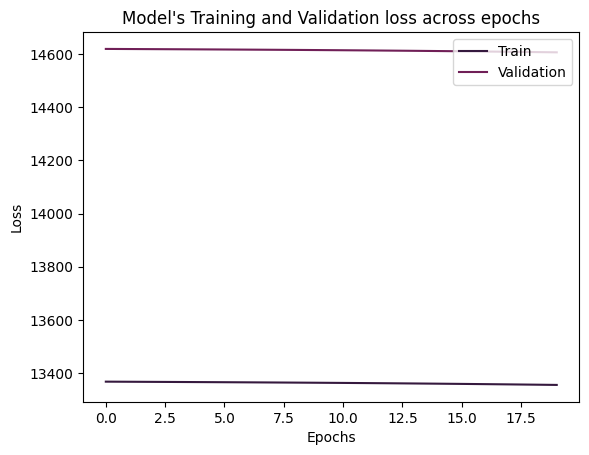

In [57]:
# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training and Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

In [58]:
# Evaluating the model

In [59]:
# define the learning rate scheduler
def lr_schedular(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * 0.95 # Adjust the decay factor

In [60]:
# creating the model
model = keras.Sequential([
    layers.Dense(units = 256, input_dim=input_dim, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(units = 256, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(units = 256, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(units = 1, activation = "linear")
])

In [61]:
# Compile the model with a lower learning rate
model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [62]:
# Train the model with the learning rate scheduler
history = model.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 30,
    batch_size = 64,
    callbacks = [[LearningRateScheduler(lr_schedular)]],
    verbose = True
)

Epoch 1/30
3/3 [==============================] - 2s 126ms/step - loss: 240737824.0000 - mean_absolute_error: 13367.3135 - val_loss: 308303840.0000 - val_mean_absolute_error: 14620.5361 - lr: 0.0010
Epoch 2/30
3/3 [==============================] - 0s 29ms/step - loss: 240698784.0000 - mean_absolute_error: 13367.3604 - val_loss: 308299296.0000 - val_mean_absolute_error: 14620.5215 - lr: 0.0010
Epoch 3/30
3/3 [==============================] - 0s 19ms/step - loss: 240649984.0000 - mean_absolute_error: 13367.1260 - val_loss: 308293888.0000 - val_mean_absolute_error: 14620.5273 - lr: 0.0010
Epoch 4/30
3/3 [==============================] - 0s 18ms/step - loss: 240623264.0000 - mean_absolute_error: 13367.3018 - val_loss: 308287424.0000 - val_mean_absolute_error: 14620.5459 - lr: 0.0010
Epoch 5/30
3/3 [==============================] - 0s 19ms/step - loss: 240577536.0000 - mean_absolute_error: 13367.0312 - val_loss: 308280256.0000 - val_mean_absolute_error: 14620.5986 - lr: 0.0010
Epoch 6/3

In [63]:
# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

1/1 [==============================] - 0s 26ms/step - loss: 165568320.0000 - mean_absolute_error: 11405.4131
Metric loss : 165568320.0
Metric mean_absolute_error : 11405.41


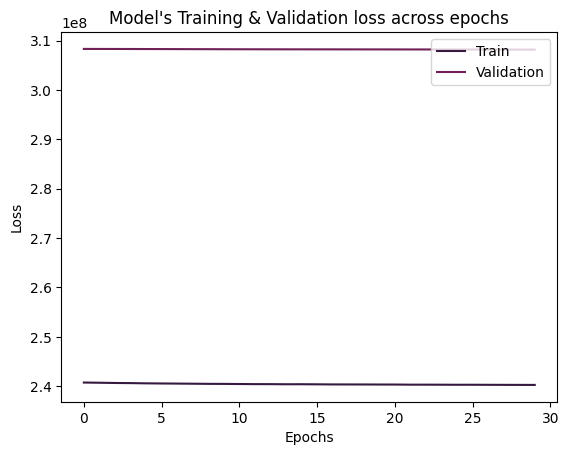

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [65]:
# Increase model complexity
model = keras.Sequential([
    layers.Dense(512, input_dim=X_train_preprocessed.shape[1], activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="linear")
])


# Implement a learning rate schedule
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)

# Compile the model with the learning rate schedule
model.compile(optimizer=optimizer,
              loss="mean_squared_error",
              metrics=["mean_absolute_error"])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_preprocessed, y_train,
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=100, batch_size=64,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))


Epoch 1/100
3/3 [==============================] - 1s 103ms/step - loss: 240742288.0000 - mean_absolute_error: 13366.9629 - val_loss: 308266528.0000 - val_mean_absolute_error: 14619.1826
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 240703776.0000 - mean_absolute_error: 13365.5146 - val_loss: 308200832.0000 - val_mean_absolute_error: 14617.0107
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 240637088.0000 - mean_absolute_error: 13362.9600 - val_loss: 308078912.0000 - val_mean_absolute_error: 14613.0068
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 240506656.0000 - mean_absolute_error: 13358.2578 - val_loss: 307862336.0000 - val_mean_absolute_error: 14605.9121
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 240284160.0000 - mean_absolute_error: 13350.0586 - val_loss: 307498624.0000 - val_mean_absolute_error: 14593.9785
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - los

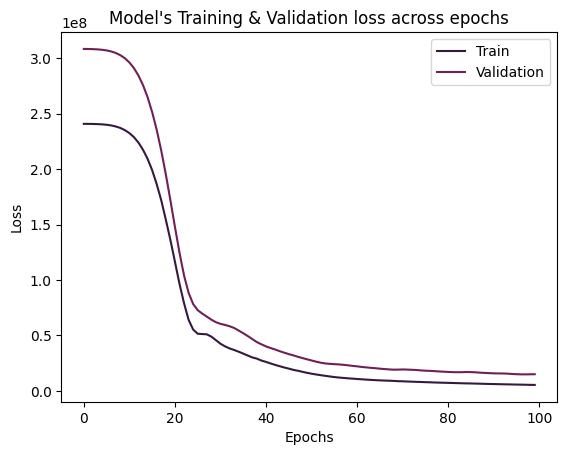

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [67]:
# Create a RandomForestRegressor for comparison
rf_model = RandomForestRegressor()
rf_model.fit(X_train_preprocessed, y_train)

# Evaluate RandomForestRegressor on the test set
rf_predictions = rf_model.predict(X_test_preprocessed)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print("RandomForestRegressor Metrics:")
print("MAE:", round(rf_mae, 2))
print("MSE:", round(rf_mse, 2))

# Evaluate the Neural Network on the test set
nn_result = model.evaluate(X_test_preprocessed, y_test)
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(nn_result[i], 2))

RandomForestRegressor Metrics:
MAE: 1268.63
MSE: 3829278.47
1/1 [==============================] - 0s 24ms/step - loss: 5743767.0000 - mean_absolute_error: 1923.1399
Metric loss : 5743767.0
Metric mean_absolute_error : 1923.14


In [68]:
# Ensemble prediction using average of Neural Network and Random Forest
nn_predictions = model.predict(X_test_preprocessed).flatten()  # Flatten to 1D
ensemble_predictions = (nn_predictions + rf_predictions) / 2

ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

print("Ensemble Metrics:")
print("MAE:", round(ensemble_mae, 2))
print("MSE:", round(ensemble_mse, 2))

1/1 [==============================] - 0s 102ms/step
Ensemble Metrics:
MAE: 1168.56
MSE: 2853078.79


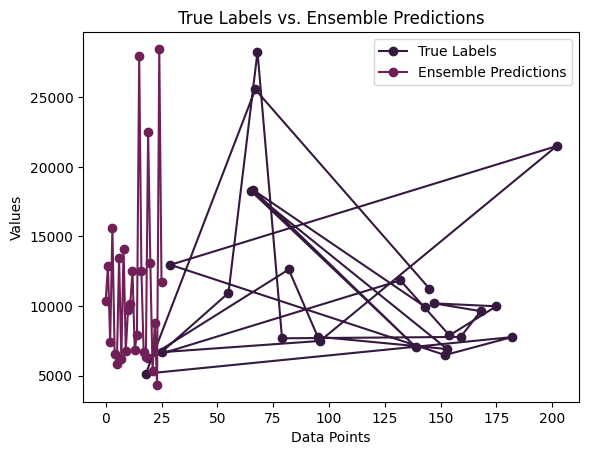

In [69]:
plt.plot(y_test, label='True Labels', marker='o')
plt.plot(ensemble_predictions, label='Ensemble Predictions', marker='o')

plt.title('True Labels vs. Ensemble Predictions')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()